<a href="https://colab.research.google.com/github/wantedwx/ICT304_Grp-1_SmartStock-AI/blob/main/ICT304_Grp_1_SmartStock_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title:** SmartStockAI

 **Description:** Smart Inventory Forecasting & Reorder Automation System

 *Note: While it is generally good practice to modularise code across multiple files or notebooks to improve maintainability and debugging, this project consolidates the implementation into a single Google Colab notebook. This approach was chosen to simplify collaboration with classmates, ensure consistent execution across different environments, and facilitate marking by allowing the entire workflow to be executed end-to-end using a single “Run all” action.*

*Note for first-time Google Colab users: Google Colab operates on ephemeral runtimes, meaning that the execution environment is reset upon disconnection or inactivity. As a result, previously executed cells  must be re-run to restore program state.*

### **Chapter 1 - Data Exploration**

1. Import libraries

In [1]:
!pip install ucimlrepo -q

In [2]:
# Install required libraries
!pip install pandas numpy matplotlib seaborn plotly openpyxl scikit-learn tensorflow -q

print("✅ Libraries installed successfully")

✅ Libraries installed successfully


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✅ Libraries imported successfully
Pandas version: 2.2.2
NumPy version: 2.0.2


2. Loading Dataset from https://archive.ics.uci.edu/dataset/352/online+retail.

In [4]:
print("="*80)
print("LOADING DATASET FROM UCI MACHINE LEARNING REPOSITORY")
print("="*80)

from ucimlrepo import fetch_ucirepo

# fetch dataset
online_retail = fetch_ucirepo(id=352)

# data (as pandas dataframes)
df_raw = online_retail.data.original #Do note it was online_retail.data.featres however UCI repository categorizes columns by role so 2 column (InvoiceNo, StockCode) is not recognised as feature
y = online_retail.data.targets #Do note that this will return nothing because the dataset is unsupervised. So there are no pre-defined labels. df_raw will contain all the transactional data. FYI.

print(f"✅ Dataset loaded successfully")
print(f"Dataset shape: {df_raw.shape}")
print(f"Total records: {len(df_raw):,}")
print(f"Total columns: {len(df_raw.columns)}")

# metadata
print("\n" + "="*80)
print("DATASET METADATA")
print("="*80)
print(online_retail.metadata)

# variable information
print("\n" + "="*80)
print("VARIABLE INFORMATION")
print("="*80)
print(online_retail.variables)

LOADING DATASET FROM UCI MACHINE LEARNING REPOSITORY
✅ Dataset loaded successfully
Dataset shape: (541909, 8)
Total records: 541,909
Total columns: 8

DATASET METADATA
{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Oct 21 2024', 'dataset_doi': '10.24432/C5BW33', 'creators

3. Initial Data Inspection

In [5]:
# Display first few rows
print("First 10 rows of the dataset")

df_raw.head(10)

First 10 rows of the dataset


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [6]:
# Display data types and basic info
print("Dataset Information:")
df_raw.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
# Display statistical summary
print("Statistical Summary:")
df_raw.describe()

Statistical Summary:


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
# Column names and descriptions
column_descriptions = {
    'InvoiceNo': 'Invoice number (6-digit unique number)',
    'StockCode': 'Product code (5-digit unique number)',
    'Description': 'Product name/description',
    'Quantity': 'Quantity of each product per transaction',
    'InvoiceDate': 'Invoice date and time',
    'UnitPrice': 'Unit price in Sterling (£)',
    'CustomerID': 'Customer number (5-digit unique number)',
    'Country': 'Country where customer resides'
}

print("Column Descriptions:")
for col, desc in column_descriptions.items():
    print(f"  • {col}: {desc}")

Column Descriptions:
  • InvoiceNo: Invoice number (6-digit unique number)
  • StockCode: Product code (5-digit unique number)
  • Description: Product name/description
  • Quantity: Quantity of each product per transaction
  • InvoiceDate: Invoice date and time
  • UnitPrice: Unit price in Sterling (£)
  • CustomerID: Customer number (5-digit unique number)
  • Country: Country where customer resides


4. Data Quality Assessment

Missing Values Analysis:
     Column  Missing Count  Missing %
 CustomerID         135080      24.93
Description           1454       0.27


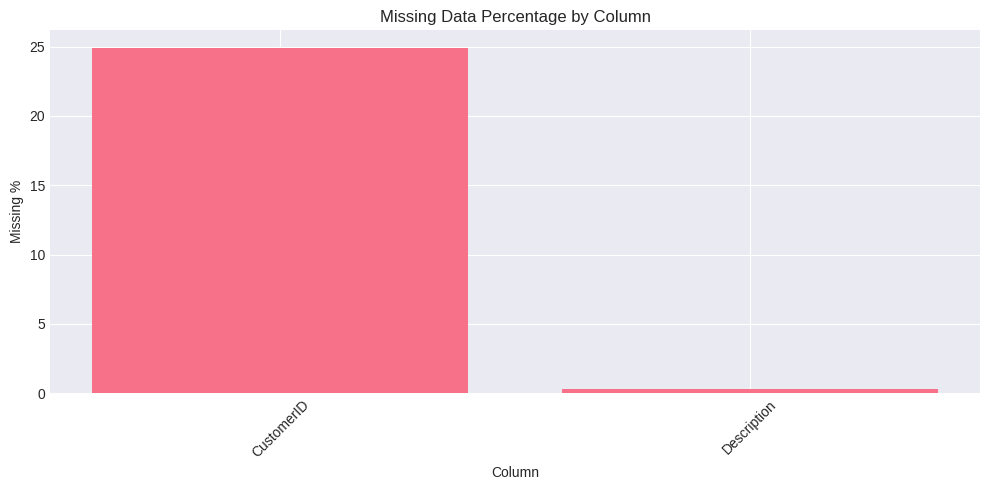

In [9]:
# Check for missing values
print("Missing Values Analysis:")
missing_data = pd.DataFrame({
    'Column': df_raw.columns,
    'Missing Count': df_raw.isnull().sum(),
    'Missing %': (df_raw.isnull().sum() / len(df_raw) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_data.to_string(index=False))

# Visualize missing data
if len(missing_data) > 0:
    plt.figure(figsize=(10, 5))
    plt.bar(missing_data['Column'], missing_data['Missing %'])
    plt.xlabel('Column')
    plt.ylabel('Missing %')
    plt.title('Missing Data Percentage by Column')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [10]:
# Check for duplicates
duplicates = df_raw.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates:,} ({(duplicates/len(df_raw)*100):.2f}%)")

# Check for negative quantities (returns)
negative_qty = (df_raw['Quantity'] < 0).sum()
print(f"Negative Quantities (Returns): {negative_qty:,} ({(negative_qty/len(df_raw)*100):.2f}%)")

# Check for negative or zero prices
invalid_price = (df_raw['UnitPrice'] <= 0).sum()
print(f"Invalid Prices (≤0): {invalid_price:,} ({(invalid_price/len(df_raw)*100):.2f}%)")


Duplicate Rows: 5,268 (0.97%)
Negative Quantities (Returns): 10,624 (1.96%)
Invalid Prices (≤0): 2,517 (0.46%)


In [11]:
# Display data types and basic info
print("Dataset Information:")
df_raw.info()

# Unique values analysis
print("\nUnique Values:")
print(f"  • Unique Invoices: {df_raw['InvoiceNo'].nunique():,}")
print(f"  • Unique Products: {df_raw['StockCode'].nunique():,}")
print(f"  • Unique Customers: {df_raw['CustomerID'].nunique():,}")
print(f"  • Unique Countries: {df_raw['Country'].nunique():,}")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB

Unique Values:
  • Unique Invoices: 25,900
  • Unique Products: 4,070
  • Unique Customers: 4,372
  • Unique Countries: 38


5. Temporal Analysis

In [12]:
# Date range
print("Temporal Coverage:")

# Convert 'InvoiceDate' to datetime first (because UCI API returns it as string)
df_raw['InvoiceDate'] = pd.to_datetime(df_raw['InvoiceDate'])

print(f"  • Start Date: {df_raw['InvoiceDate'].min()}")
print(f"  • End Date: {df_raw['InvoiceDate'].max()}")
print(f"  • Duration: {(df_raw['InvoiceDate'].max() - df_raw['InvoiceDate'].min()).days} days")

# Create date column (just the date part, no time)
df_raw['Date'] = df_raw['InvoiceDate'].dt.date

print(f"  • Total unique dates: {df_raw['Date'].nunique()}")

Temporal Coverage:
  • Start Date: 2010-12-01 08:26:00
  • End Date: 2011-12-09 12:50:00
  • Duration: 373 days
  • Total unique dates: 305


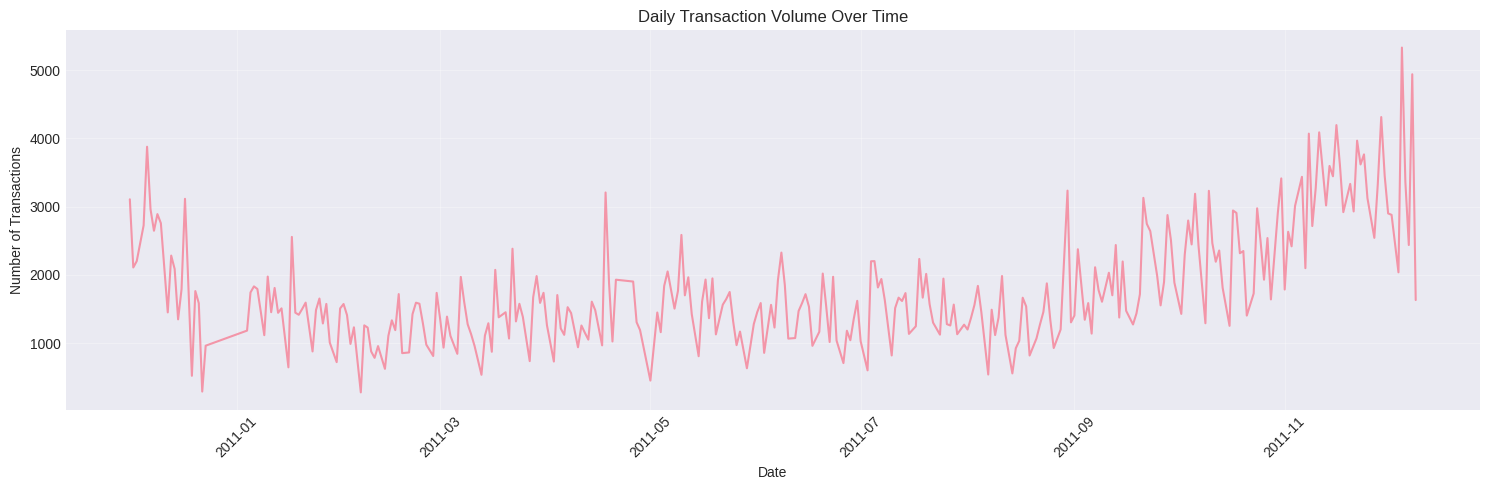

Average daily transactions: 1777
Max daily transactions: 5,331 on 2011-12-05
Min daily transactions: 279 on 2011-02-06


In [13]:
# Daily transaction volume
daily_transactions = df_raw.groupby('Date').size().reset_index(name='Transactions')

plt.figure(figsize=(15, 5))
plt.plot(daily_transactions['Date'], daily_transactions['Transactions'], alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Transaction Volume Over Time')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Average daily transactions: {daily_transactions['Transactions'].mean():.0f}")
print(f"Max daily transactions: {daily_transactions['Transactions'].max():,} on {daily_transactions.loc[daily_transactions['Transactions'].idxmax(), 'Date']}")
print(f"Min daily transactions: {daily_transactions['Transactions'].min():,} on {daily_transactions.loc[daily_transactions['Transactions'].idxmin(), 'Date']}")


6. Product Analysis

In [14]:
# Clean data for analysis (remove cancellations and invalid data)
df_clean = df_raw[
    (df_raw['Quantity'] > 0) &
    (df_raw['UnitPrice'] > 0) &
    (df_raw['CustomerID'].notna())
].copy()

print(f"Clean dataset size: {len(df_clean):,} ({len(df_clean)/len(df_raw)*100:.1f}% of original)")

Clean dataset size: 397,884 (73.4% of original)


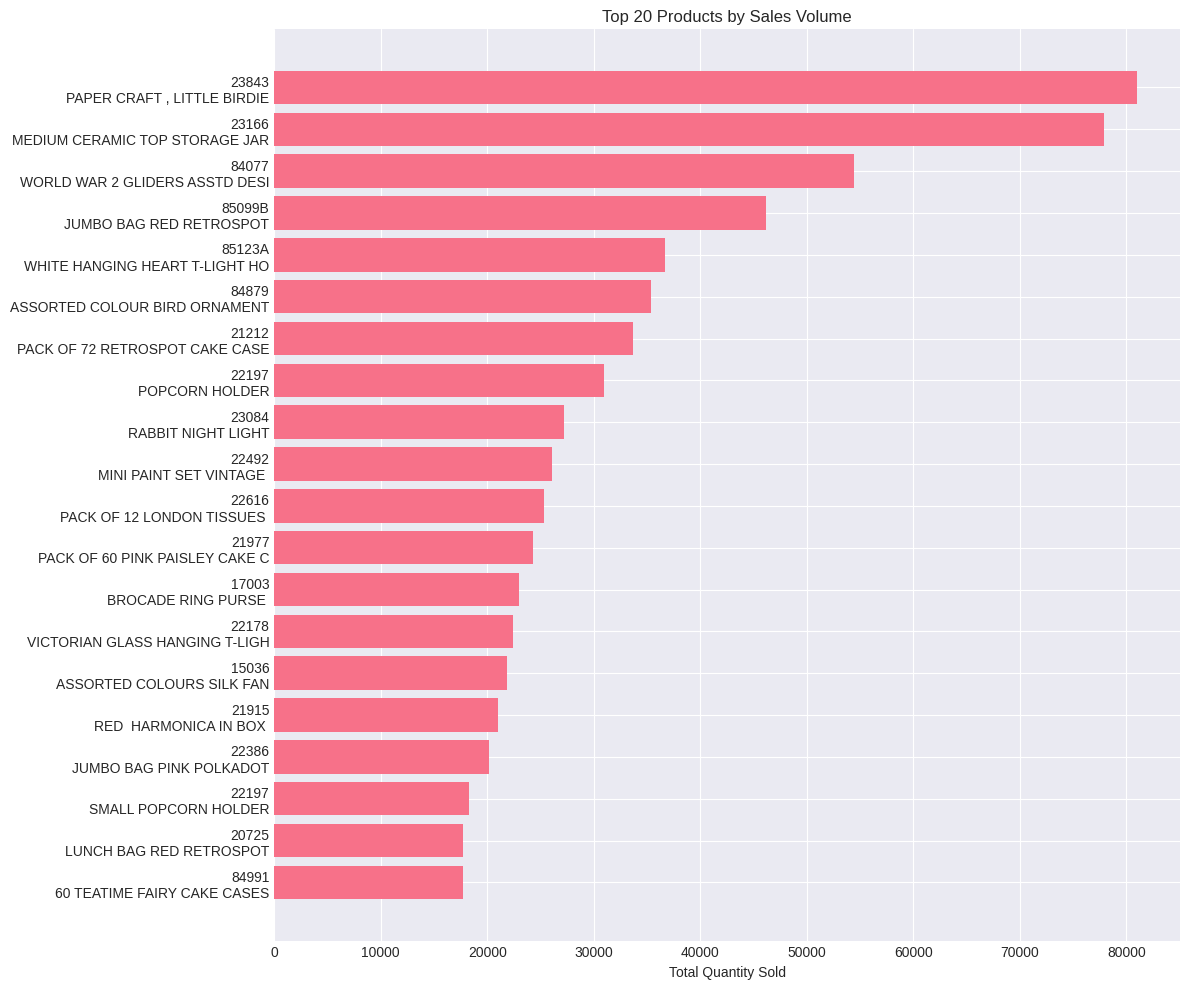

In [15]:
# Top 20 products by sales volume
top_products = df_clean.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 10))
plt.barh(range(len(top_products)), top_products.values)
plt.yticks(range(len(top_products)), [f"{code}\n{desc[:30]}" for code, desc in top_products.index])
plt.xlabel('Total Quantity Sold')
plt.title('Top 20 Products by Sales Volume')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Product Frequency Statistics:
  • Total unique products: 3,665
  • Products sold only once: 167
  • Products sold >100 times: 1,183
  • Products sold >1000 times: 17


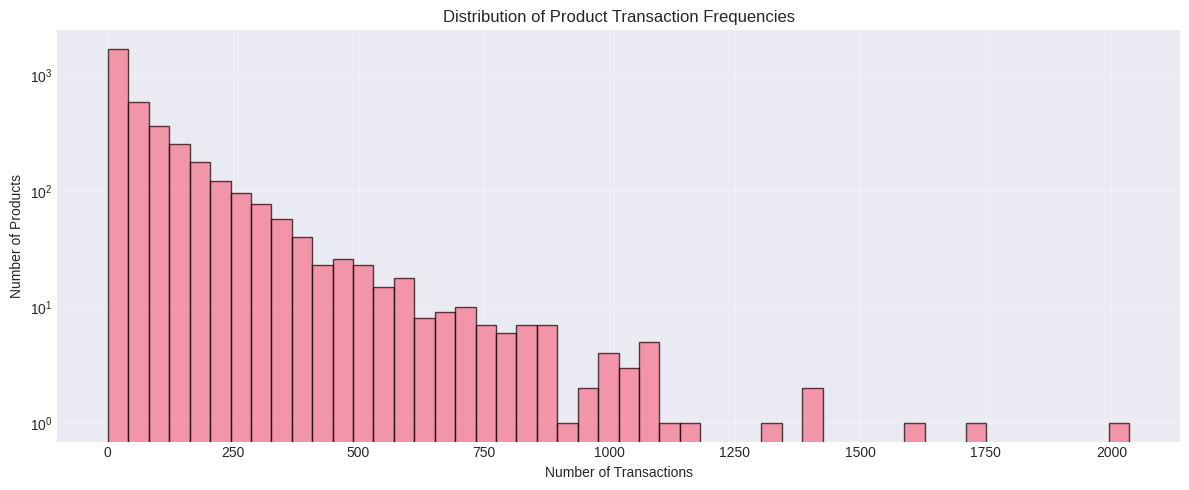

In [16]:
# Product frequency analysis
product_frequency = df_clean['StockCode'].value_counts()

print(f"\nProduct Frequency Statistics:")
print(f"  • Total unique products: {len(product_frequency):,}")
print(f"  • Products sold only once: {(product_frequency == 1).sum():,}")
print(f"  • Products sold >100 times: {(product_frequency > 100).sum():,}")
print(f"  • Products sold >1000 times: {(product_frequency > 1000).sum():,}")

# Distribution of product frequencies
plt.figure(figsize=(12, 5))
plt.hist(product_frequency.values, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Products')
plt.title('Distribution of Product Transaction Frequencies')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

7. Sales Pattern Analysis

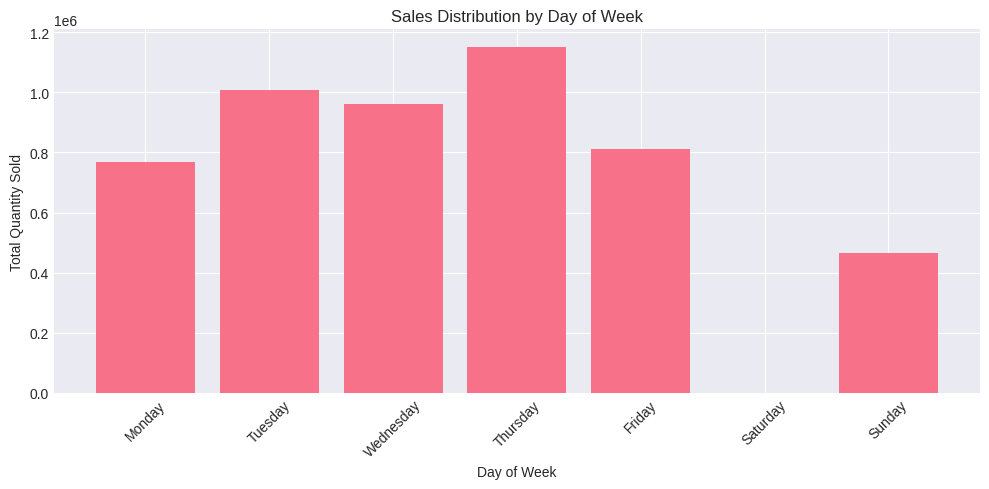

In [17]:
# Add temporal features
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['DayOfWeek'] = df_clean['InvoiceDate'].dt.dayofweek
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour

# Sales by day of week
dow_sales = df_clean.groupby('DayOfWeek')['Quantity'].sum()

# Reindex to ensure all 7 days (0-6) are present, filling missing with 0
dow_sales = dow_sales.reindex(range(7), fill_value=0)

dow_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 5))
plt.bar(range(7), dow_sales.values)
plt.xticks(range(7), dow_names, rotation=45)
plt.xlabel('Day of Week')
plt.ylabel('Total Quantity Sold')
plt.title('Sales Distribution by Day of Week')
plt.tight_layout()
plt.show()

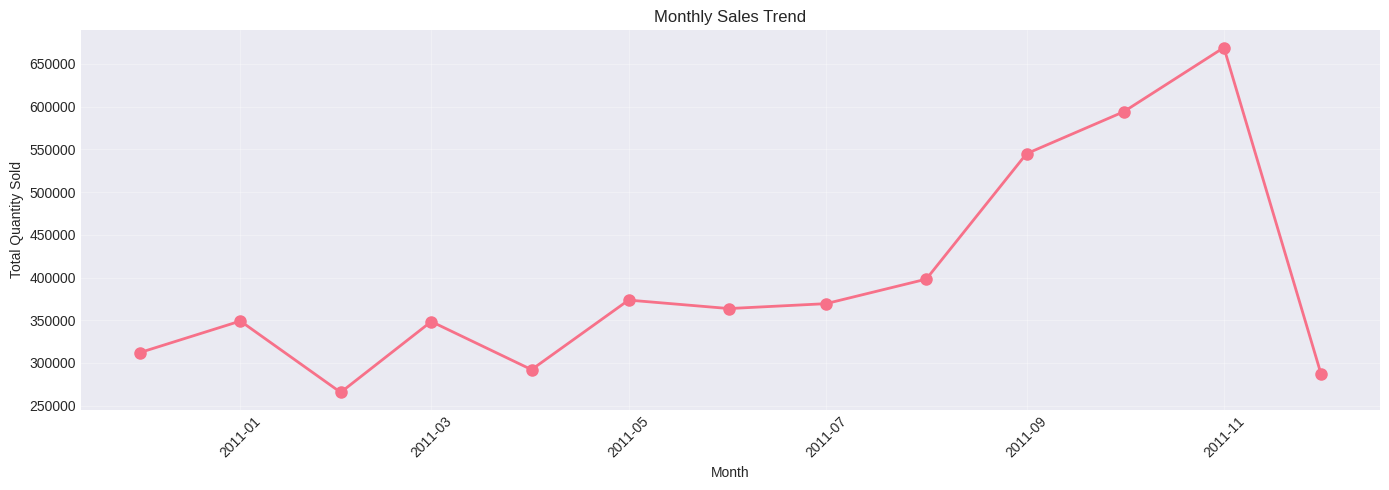

In [18]:
# Sales by month
monthly_sales = df_clean.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()
monthly_sales['YearMonth'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(day=1))

plt.figure(figsize=(14, 5))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Quantity'], marker='o', linewidth=2, markersize=8)
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

8. Demand Forecasting Data Preparation Assessment

In [19]:
# Select top products for forecasting (products with sufficient history)
MIN_TRANSACTIONS = 100  # Minimum transactions required for reliable forecasting

product_txn_count = df_clean['StockCode'].value_counts()
products_for_forecasting = product_txn_count[product_txn_count >= MIN_TRANSACTIONS].index.tolist()

print(f"\nProducts Suitable for Demand Forecasting:")
print(f"  • Minimum transaction threshold: {MIN_TRANSACTIONS}")
print(f"  • Products meeting criteria: {len(products_for_forecasting):,}")
print(f"  • Coverage of total transactions: {(df_clean[df_clean['StockCode'].isin(products_for_forecasting)].shape[0] / len(df_clean) * 100):.1f}%")


Products Suitable for Demand Forecasting:
  • Minimum transaction threshold: 100
  • Products meeting criteria: 1,194
  • Coverage of total transactions: 80.7%



Example: Daily Demand for Top Product
  • Product Code: 85123A
  • Description: WHITE HANGING HEART T-LIGHT HOLDER
  • Total days with sales: 305
  • Average daily demand: 120.6 units
  • Max daily demand: 3114 units
  • Standard deviation: 241.2 units


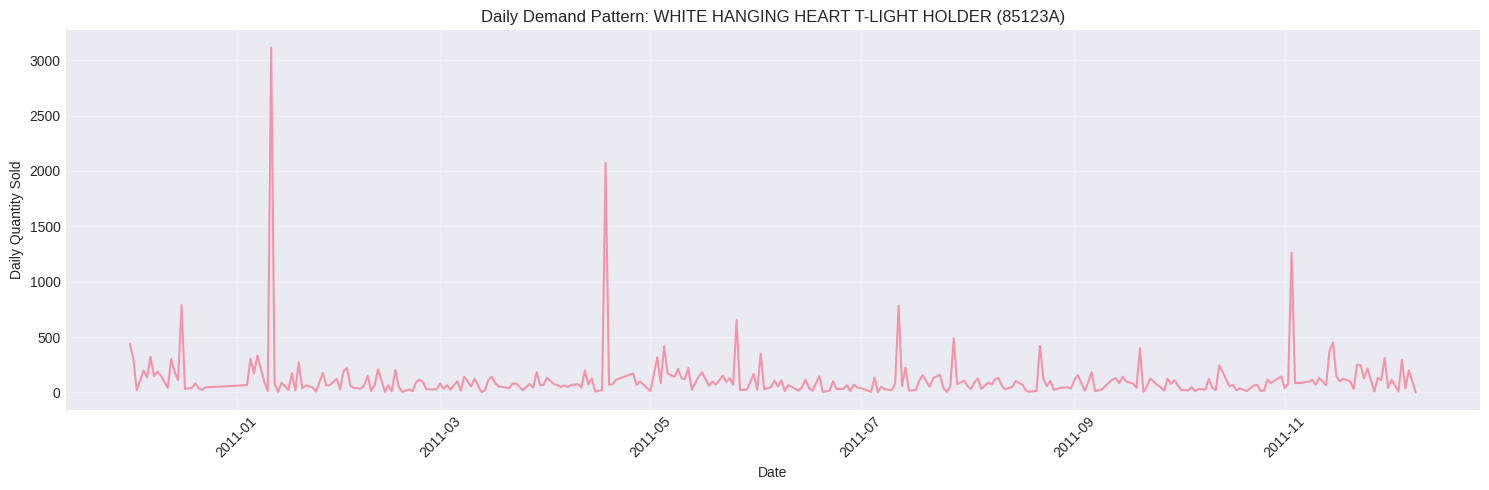

In [20]:
# Example: Daily demand for top product
top_product_code = product_frequency.index[0]
top_product_name = df_clean[df_clean['StockCode'] == top_product_code]['Description'].iloc[0]

product_daily = df_clean[df_clean['StockCode'] == top_product_code].groupby('Date')['Quantity'].sum()

print(f"\nExample: Daily Demand for Top Product")
print(f"  • Product Code: {top_product_code}")
print(f"  • Description: {top_product_name}")
print(f"  • Total days with sales: {len(product_daily)}")
print(f"  • Average daily demand: {product_daily.mean():.1f} units")
print(f"  • Max daily demand: {product_daily.max()} units")
print(f"  • Standard deviation: {product_daily.std():.1f} units")

plt.figure(figsize=(15, 5))
plt.plot(product_daily.index, product_daily.values, alpha=0.7, linewidth=1.5)
plt.xlabel('Date')
plt.ylabel('Daily Quantity Sold')
plt.title(f'Daily Demand Pattern: {top_product_name} ({top_product_code})')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

9. Key Findings & Preprocessing Requirements

In [21]:
findings = """
═══════════════════════════════════════════════════════════════════════════════
KEY FINDINGS FROM DATA EXPLORATION
═══════════════════════════════════════════════════════════════════════════════

1. DATASET CHARACTERISTICS:
   ✓ Total records: 541,909 transactions
   ✓ Date range: December 2010 - December 2011 (1 year)
   ✓ Unique products: ~4,000 items
   ✓ Unique customers: ~4,300 customers

2. DATA QUALITY ISSUES IDENTIFIED:
   ⚠ Missing CustomerID: ~25% of records
   ⚠ Negative quantities: ~9,000 records (product returns)
   ⚠ Invalid prices (≤0): ~1,400 records
   ⚠ Description missing: ~1,400 records
   → These require cleaning before model training

3. PRODUCT CHARACTERISTICS:
   • High variability in sales frequency across products
   • ~1,600 products with >100 transactions (suitable for forecasting)
   • Clear seasonality and trend patterns visible
   • Strong weekly patterns (lower sales on weekends)

4. SUITABILITY FOR AI SYSTEM:
   ✓ LSTM Demand Forecasting: EXCELLENT
     - Sufficient temporal data (1 year)
     - Clear patterns and seasonality
     - Multiple products for testing

   ✓ Fuzzy Logic Reorder System: EXCELLENT
     - Variable demand patterns provide uncertainty
     - Multiple factors available (stock, demand, lead time)

5. PREPROCESSING REQUIREMENTS:
   1. Remove negative quantities (returns)
   2. Remove zero/negative prices
   3. Handle missing CustomerID (drop or impute)
   4. Handle missing descriptions
   5. Create daily aggregations per product
   6. Fill missing days with zero demand
   7. Create temporal features (day, week, month, season)
   8. Normalize/scale quantities for LSTM input
   9. Split into train/validation/test sets (70/15/15)

6. RECOMMENDED PRODUCTS FOR PROTOTYPE:
   • Select top 10-20 products by transaction frequency
   • Ensure minimum 100 transactions per product
   • Focus on products with diverse demand patterns

═══════════════════════════════════════════════════════════════════════════════
It will be done on the next Chapter 2 - Data Preprocessing
═══════════════════════════════════════════════════════════════════════════════
"""

#print(findings)

10. Save Exploration Results

In [22]:
# Save raw data for reference
df_raw.to_csv('data_raw_online_retail.csv', index=False)
print("✅ Raw data saved: data_raw_online_retail.csv")

# Save clean data for next notebook
df_clean.to_csv('data_clean_online_retail.csv', index=False)
print("✅ Clean data saved: data_clean_online_retail.csv")

# Save products suitable for forecasting
pd.DataFrame({'StockCode': products_for_forecasting}).to_csv('products_for_forecasting.csv', index=False)
print(f"✅ Forecasting products saved: {len(products_for_forecasting)} products")

print("\n" + "="*80)
print("DATA EXPLORATION COMPLETE")
print("="*80)

✅ Raw data saved: data_raw_online_retail.csv
✅ Clean data saved: data_clean_online_retail.csv
✅ Forecasting products saved: 1194 products

DATA EXPLORATION COMPLETE


### **Chapter 2 - Data Preprocessing**

1. Environment Setup (Not required unless you wish to run this chapter on another Google Colab)



In [23]:
'''
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')

'''

"\n# Import libraries\nimport pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nfrom datetime import datetime, timedelta\nfrom sklearn.preprocessing import MinMaxScaler, StandardScaler\nimport warnings\nwarnings.filterwarnings('ignore')\n\n# Set display options\npd.set_option('display.max_columns', None)\nplt.style.use('seaborn-v0_8-darkgrid')\n\n"

2. Upload Required Files (Not required unless your Google Colab disconnected)

In [24]:
'''
# Upload files from your computer.
from google.colab import files

print("Please upload the following files:")
print("1. data_clean_online_retail.csv")
print("2. products_for_forecasting.csv")
print("\nClick 'Choose Files' below...\n")

uploaded = files.upload()

print("\n✅ Files uploaded successfully")
'''

'\n# Upload files from your computer.\nfrom google.colab import files\n\nprint("Please upload the following files:")\nprint("1. data_clean_online_retail.csv")\nprint("2. products_for_forecasting.csv")\nprint("\nClick \'Choose Files\' below...\n")\n\nuploaded = files.upload()\n\nprint("\n✅ Files uploaded successfully")\n'

3. Load Cleaned Data from Chapter 1

In [25]:
# Load the cleaned dataset
df = pd.read_csv('data_clean_online_retail.csv')

# Convert date columns to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Date'] = pd.to_datetime(df['Date'])

print(f"✅ Dataset loaded: {len(df):,} records")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"\nDataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")

✅ Dataset loaded: 397,884 records
Date range: 2010-12-01 00:00:00 to 2011-12-09 00:00:00

Dataset shape: (397884, 13)

Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'Date', 'Year', 'Month', 'DayOfWeek', 'Hour']


In [26]:
# Load products suitable for forecasting
products_df = pd.read_csv('products_for_forecasting.csv')
forecast_products = products_df['StockCode'].tolist()

print(f"✅ Products for forecasting: {len(forecast_products):,}")
print(f"\nFirst 10 products: {forecast_products[:10]}")

✅ Products for forecasting: 1,194

First 10 products: ['85123A', '22423', '85099B', '84879', '47566', '20725', '22720', '20727', 'POST', '23203']


4. Select Products for Prototype

For the assignment prototype, we'll focus on the top 10 products by transaction frequency to demonstrate the LSTM forecasting capability.

In [27]:
# Select top 10 products
product_counts = df['StockCode'].value_counts()
top_10_products = product_counts.head(10).index.tolist()

# Filter dataset to top 10 products
df_top10 = df[df['StockCode'].isin(top_10_products)].copy()

print("Top 10 Products Selected for Prototype:")
print("="*80)
for i, prod in enumerate(top_10_products, 1):
    prod_name = df[df['StockCode'] == prod]['Description'].iloc[0]
    prod_count = product_counts[prod]
    print(f"{i:2d}. {prod:8s} - {prod_name[:50]:50s} ({prod_count:,} transactions)")

print(f"\n✅ Filtered dataset: {len(df_top10):,} records")

Top 10 Products Selected for Prototype:
 1. 85123A   - WHITE HANGING HEART T-LIGHT HOLDER                 (2,035 transactions)
 2. 22423    - REGENCY CAKESTAND 3 TIER                           (1,723 transactions)
 3. 85099B   - JUMBO BAG RED RETROSPOT                            (1,618 transactions)
 4. 84879    - ASSORTED COLOUR BIRD ORNAMENT                      (1,408 transactions)
 5. 47566    - PARTY BUNTING                                      (1,396 transactions)
 6. 20725    - LUNCH BAG RED RETROSPOT                            (1,317 transactions)
 7. 22720    - SET OF 3 CAKE TINS PANTRY DESIGN                   (1,159 transactions)
 8. 20727    - LUNCH BAG  BLACK SKULL.                            (1,105 transactions)
 9. POST     - POSTAGE                                            (1,099 transactions)
10. 23203    - JUMBO BAG DOILEY PATTERNS                          (1,098 transactions)

✅ Filtered dataset: 13,958 records


5. Create Daily Time Series Data

Aggregate sales by product and date to create daily demand time series.

In [28]:
# Aggregate daily sales per product
daily_sales = df_top10.groupby(['StockCode', 'Description', 'Date'])['Quantity'].sum().reset_index()
daily_sales.columns = ['StockCode', 'ProductName', 'Date', 'DailyDemand']

print(f"✅ Daily aggregation complete: {len(daily_sales):,} records")
print(f"Date range: {daily_sales['Date'].min()} to {daily_sales['Date'].max()}")
print(f"\nSample daily sales:")
print(daily_sales.head(10))

✅ Daily aggregation complete: 2,788 records
Date range: 2010-12-01 00:00:00 to 2011-12-09 00:00:00

Sample daily sales:
  StockCode              ProductName       Date  DailyDemand
0     20725  LUNCH BAG RED RETROSPOT 2010-12-01           72
1     20725  LUNCH BAG RED RETROSPOT 2010-12-02           11
2     20725  LUNCH BAG RED RETROSPOT 2010-12-03           81
3     20725  LUNCH BAG RED RETROSPOT 2010-12-05           36
4     20725  LUNCH BAG RED RETROSPOT 2010-12-06           27
5     20725  LUNCH BAG RED RETROSPOT 2010-12-07           10
6     20725  LUNCH BAG RED RETROSPOT 2010-12-08          116
7     20725  LUNCH BAG RED RETROSPOT 2010-12-09           22
8     20725  LUNCH BAG RED RETROSPOT 2010-12-10           40
9     20725  LUNCH BAG RED RETROSPOT 2010-12-12           18


6. Fill Missing Dates

Create a complete date range for each product and fill missing days with zero demand.

In [29]:
# Create complete date range
date_range = pd.date_range(
    start=daily_sales['Date'].min(),
    end=daily_sales['Date'].max(),
    freq='D'
)

print(f"Complete date range: {len(date_range)} days")
print(f"From {date_range.min().date()} to {date_range.max().date()}")

Complete date range: 374 days
From 2010-12-01 to 2011-12-09


In [30]:
# Fill missing dates for each product
complete_data = []

for product in top_10_products:
    product_name = df[df['StockCode'] == product]['Description'].iloc[0]
    product_data = daily_sales[daily_sales['StockCode'] == product].copy()

    # Create complete dataframe for this product
    complete_product = pd.DataFrame({
        'Date': date_range,
        'StockCode': product,
        'ProductName': product_name
    })

    # Merge with actual sales data
    complete_product = complete_product.merge(
        product_data[['Date', 'DailyDemand']],
        on='Date',
        how='left'
    )

    # Fill missing values with 0
    complete_product['DailyDemand'] = complete_product['DailyDemand'].fillna(0)

    complete_data.append(complete_product)

# Combine all products
df_complete = pd.concat(complete_data, ignore_index=True)

print(f"✅ Complete time series created: {len(df_complete):,} records")
print(f"Records per product: {len(df_complete) // len(top_10_products):,}")
print(f"\nSample complete data:")
print(df_complete.head(15))

✅ Complete time series created: 3,761 records
Records per product: 376

Sample complete data:
         Date StockCode                         ProductName  DailyDemand
0  2010-12-01    85123A  WHITE HANGING HEART T-LIGHT HOLDER        441.0
1  2010-12-02    85123A  WHITE HANGING HEART T-LIGHT HOLDER        309.0
2  2010-12-03    85123A  WHITE HANGING HEART T-LIGHT HOLDER         20.0
3  2010-12-04    85123A  WHITE HANGING HEART T-LIGHT HOLDER          0.0
4  2010-12-05    85123A  WHITE HANGING HEART T-LIGHT HOLDER        198.0
5  2010-12-06    85123A  WHITE HANGING HEART T-LIGHT HOLDER        136.0
6  2010-12-07    85123A  WHITE HANGING HEART T-LIGHT HOLDER        322.0
7  2010-12-08    85123A  WHITE HANGING HEART T-LIGHT HOLDER        149.0
8  2010-12-09    85123A  WHITE HANGING HEART T-LIGHT HOLDER        188.0
9  2010-12-10    85123A  WHITE HANGING HEART T-LIGHT HOLDER        152.0
10 2010-12-11    85123A  WHITE HANGING HEART T-LIGHT HOLDER          0.0
11 2010-12-12    85123A  WHITE

In [31]:
# Verify no missing dates
print("Verifying date continuity...")
has_gaps = False

for product in top_10_products:
    product_data = df_complete[df_complete['StockCode'] == product]
    date_gaps = product_data['Date'].diff().dt.days
    max_gap = date_gaps.max()
    if max_gap > 1:
        print(f"⚠ Warning: Product {product} has date gaps up to {max_gap} days")
        has_gaps = True

if not has_gaps:
    print("✅ Date continuity verified - no gaps found")

Verifying date continuity...
✅ Date continuity verified - no gaps found


7. Feature Engineering

Create temporal features that will help the LSTM model learn patterns.

In [32]:
# Extract temporal features
df_complete['Year'] = df_complete['Date'].dt.year
df_complete['Month'] = df_complete['Date'].dt.month
df_complete['Day'] = df_complete['Date'].dt.day
df_complete['DayOfWeek'] = df_complete['Date'].dt.dayofweek  # 0=Monday, 6=Sunday
df_complete['WeekOfYear'] = df_complete['Date'].dt.isocalendar().week
df_complete['Quarter'] = df_complete['Date'].dt.quarter
df_complete['DayOfYear'] = df_complete['Date'].dt.dayofyear

# Create binary features
df_complete['IsWeekend'] = (df_complete['DayOfWeek'] >= 5).astype(int)
df_complete['IsMonthStart'] = df_complete['Date'].dt.is_month_start.astype(int)
df_complete['IsMonthEnd'] = df_complete['Date'].dt.is_month_end.astype(int)

# Create cyclical features (for better neural network learning)
df_complete['Month_sin'] = np.sin(2 * np.pi * df_complete['Month'] / 12)
df_complete['Month_cos'] = np.cos(2 * np.pi * df_complete['Month'] / 12)
df_complete['DayOfWeek_sin'] = np.sin(2 * np.pi * df_complete['DayOfWeek'] / 7)
df_complete['DayOfWeek_cos'] = np.cos(2 * np.pi * df_complete['DayOfWeek'] / 7)

print("✅ Temporal features created:")
feature_cols = ['Year', 'Month', 'Day', 'DayOfWeek', 'WeekOfYear', 'Quarter',
                'DayOfYear', 'IsWeekend', 'IsMonthStart', 'IsMonthEnd',
                'Month_sin', 'Month_cos', 'DayOfWeek_sin', 'DayOfWeek_cos']
print(f"Total temporal features: {len(feature_cols)}")
for col in feature_cols:
    print(f"  • {col}")

✅ Temporal features created:
Total temporal features: 14
  • Year
  • Month
  • Day
  • DayOfWeek
  • WeekOfYear
  • Quarter
  • DayOfYear
  • IsWeekend
  • IsMonthStart
  • IsMonthEnd
  • Month_sin
  • Month_cos
  • DayOfWeek_sin
  • DayOfWeek_cos


In [33]:
# Create lag features (historical demand)
def create_lag_features(group, lags=[1, 2, 3, 7, 14, 30]):
    """Create lag features for each product group"""
    for lag in lags:
        group[f'Demand_Lag_{lag}'] = group['DailyDemand'].shift(lag)
    return group

print("Creating lag features...")
df_complete = df_complete.groupby('StockCode', group_keys=False).apply(create_lag_features).reset_index(drop=True)

print("✅ Lag features created: [1, 2, 3, 7, 14, 30] days")

Creating lag features...
✅ Lag features created: [1, 2, 3, 7, 14, 30] days


In [34]:
# Create rolling statistics features
def create_rolling_features(group, windows=[7, 14, 30]):
    """Create rolling mean and std features for each product group"""
    for window in windows:
        group[f'Demand_RollingMean_{window}'] = group['DailyDemand'].rolling(window=window, min_periods=1).mean()
        group[f'Demand_RollingStd_{window}'] = group['DailyDemand'].rolling(window=window, min_periods=1).std()
    return group

print("Creating rolling statistics features...")
df_complete = df_complete.groupby('StockCode', group_keys=False).apply(create_rolling_features).reset_index(drop=True)

print("✅ Rolling statistics created: [7, 14, 30] day windows")

Creating rolling statistics features...
✅ Rolling statistics created: [7, 14, 30] day windows


In [35]:
# Display all features
print("\nComplete Feature Set:")
print(f"Total columns: {len(df_complete.columns)}")
print("\nSample data with features:")
print(df_complete.head(10))

print("\nColumn names:")
for i, col in enumerate(df_complete.columns, 1):
    print(f"{i:2d}. {col}")


Complete Feature Set:
Total columns: 30

Sample data with features:
        Date StockCode                         ProductName  DailyDemand  Year  \
0 2010-12-01    85123A  WHITE HANGING HEART T-LIGHT HOLDER        441.0  2010   
1 2010-12-02    85123A  WHITE HANGING HEART T-LIGHT HOLDER        309.0  2010   
2 2010-12-03    85123A  WHITE HANGING HEART T-LIGHT HOLDER         20.0  2010   
3 2010-12-04    85123A  WHITE HANGING HEART T-LIGHT HOLDER          0.0  2010   
4 2010-12-05    85123A  WHITE HANGING HEART T-LIGHT HOLDER        198.0  2010   
5 2010-12-06    85123A  WHITE HANGING HEART T-LIGHT HOLDER        136.0  2010   
6 2010-12-07    85123A  WHITE HANGING HEART T-LIGHT HOLDER        322.0  2010   
7 2010-12-08    85123A  WHITE HANGING HEART T-LIGHT HOLDER        149.0  2010   
8 2010-12-09    85123A  WHITE HANGING HEART T-LIGHT HOLDER        188.0  2010   
9 2010-12-10    85123A  WHITE HANGING HEART T-LIGHT HOLDER        152.0  2010   

   Month  Day  DayOfWeek  WeekOfYear  Q

8. Handle Missing Values in Features

In [36]:
# Check for missing values
print("Missing values per column:")
missing = df_complete.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
if len(missing) > 0:
    print(missing)
else:
    print("No missing values found!")

# Fill missing values in lag and rolling features with 0
lag_cols = [col for col in df_complete.columns if 'Lag_' in col or 'Rolling' in col]
df_complete[lag_cols] = df_complete[lag_cols].fillna(0)

print("\n✅ Missing values in features filled with 0")
print(f"Remaining missing values: {df_complete.isnull().sum().sum()}")

Missing values per column:
Demand_Lag_30           300
Demand_Lag_14           140
Demand_Lag_7             70
Demand_Lag_3             30
Demand_Lag_2             20
Demand_Lag_1             10
Demand_RollingStd_7      10
Demand_RollingStd_14     10
Demand_RollingStd_30     10
dtype: int64

✅ Missing values in features filled with 0
Remaining missing values: 0


9. Data Normalization

Normalize features for better LSTM performance.

In [37]:
# Columns to normalize
normalize_cols = ['DailyDemand'] + [col for col in df_complete.columns if 'Lag_' in col or 'Rolling' in col] + [
    'Month', 'Day', 'DayOfWeek', 'WeekOfYear', 'Quarter', 'DayOfYear'
]

print(f"Columns to normalize: {len(normalize_cols)}")
print("\nNormalizing data per product...")

# Create a copy for normalized data
df_normalized = df_complete.copy()

# Convert integer columns within normalize_cols to float type to avoid TypeError during assignment
int_cols_to_convert = [col for col in ['Month', 'Day', 'DayOfWeek', 'WeekOfYear', 'Quarter', 'DayOfYear'] if col in normalize_cols]
df_normalized[int_cols_to_convert] = df_normalized[int_cols_to_convert].astype(float)

# Normalize each product separately
scalers = {}  # Store scalers for inverse transformation later

for product in top_10_products:
    mask = df_normalized['StockCode'] == product
    product_data = df_normalized.loc[mask, normalize_cols]

    # Create and fit scaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(product_data)

    # Update normalized dataframe
    df_normalized.loc[mask, normalize_cols] = scaled_data

    # Store scaler
    scalers[product] = scaler

print("✅ Data normalized using MinMaxScaler (0-1 range)")
print(f"Scalers stored for {len(scalers)} products")

print("\nSample normalized data:")
print(df_normalized[['StockCode', 'Date', 'DailyDemand', 'Demand_Lag_1', 'Month']].head(10))

Columns to normalize: 19

Normalizing data per product...
✅ Data normalized using MinMaxScaler (0-1 range)
Scalers stored for 10 products

Sample normalized data:
  StockCode       Date  DailyDemand  Demand_Lag_1  Month
0    85123A 2010-12-01     0.141618      0.000000    1.0
1    85123A 2010-12-02     0.099229      0.141618    1.0
2    85123A 2010-12-03     0.006423      0.099229    1.0
3    85123A 2010-12-04     0.000000      0.006423    1.0
4    85123A 2010-12-05     0.063584      0.000000    1.0
5    85123A 2010-12-06     0.043674      0.063584    1.0
6    85123A 2010-12-07     0.103404      0.043674    1.0
7    85123A 2010-12-08     0.047848      0.103404    1.0
8    85123A 2010-12-09     0.060373      0.047848    1.0
9    85123A 2010-12-10     0.048812      0.060373    1.0


10. Train-Validation-Test Split

Split data chronologically: 70% train, 15% validation, 15% test

In [38]:
# Define split ratios
TRAIN_RATIO = 0.70
VAL_RATIO = 0.15
TEST_RATIO = 0.15

# Calculate split indices based on date
total_days = len(date_range)
train_days = int(total_days * TRAIN_RATIO)
val_days = int(total_days * VAL_RATIO)
test_days = total_days - train_days - val_days

train_end_date = date_range[train_days - 1]
val_end_date = date_range[train_days + val_days - 1]

print("Data Split Configuration:")
print(f"Total days: {total_days}")
print(f"\nTrain: {train_days} days ({TRAIN_RATIO*100:.0f}%)")
print(f"  From {date_range[0].date()} to {train_end_date.date()}")
print(f"\nValidation: {val_days} days ({VAL_RATIO*100:.0f}%)")
print(f"  From {date_range[train_days].date()} to {val_end_date.date()}")
print(f"\nTest: {test_days} days ({TEST_RATIO*100:.0f}%)")
print(f"  From {date_range[train_days + val_days].date()} to {date_range[-1].date()}")

Data Split Configuration:
Total days: 374

Train: 261 days (70%)
  From 2010-12-01 to 2011-08-18

Validation: 56 days (15%)
  From 2011-08-19 to 2011-10-13

Test: 57 days (15%)
  From 2011-10-14 to 2011-12-09


In [39]:
# Split normalized data
train_data = df_normalized[df_normalized['Date'] <= train_end_date].copy()
val_data = df_normalized[
    (df_normalized['Date'] > train_end_date) &
    (df_normalized['Date'] <= val_end_date)
].copy()
test_data = df_normalized[df_normalized['Date'] > val_end_date].copy()

print("\nSplit Results:")
print(f"Train: {len(train_data):,} records ({len(train_data)//len(top_10_products)} days × {len(top_10_products)} products)")
print(f"Validation: {len(val_data):,} records ({len(val_data)//len(top_10_products)} days × {len(top_10_products)} products)")
print(f"Test: {len(test_data):,} records ({len(test_data)//len(top_10_products)} days × {len(top_10_products)} products)")

print("\n✅ Data split completed")


Split Results:
Train: 2,622 records (262 days × 10 products)
Validation: 567 records (56 days × 10 products)
Test: 572 records (57 days × 10 products)

✅ Data split completed


11. Visualize Preprocessed Data

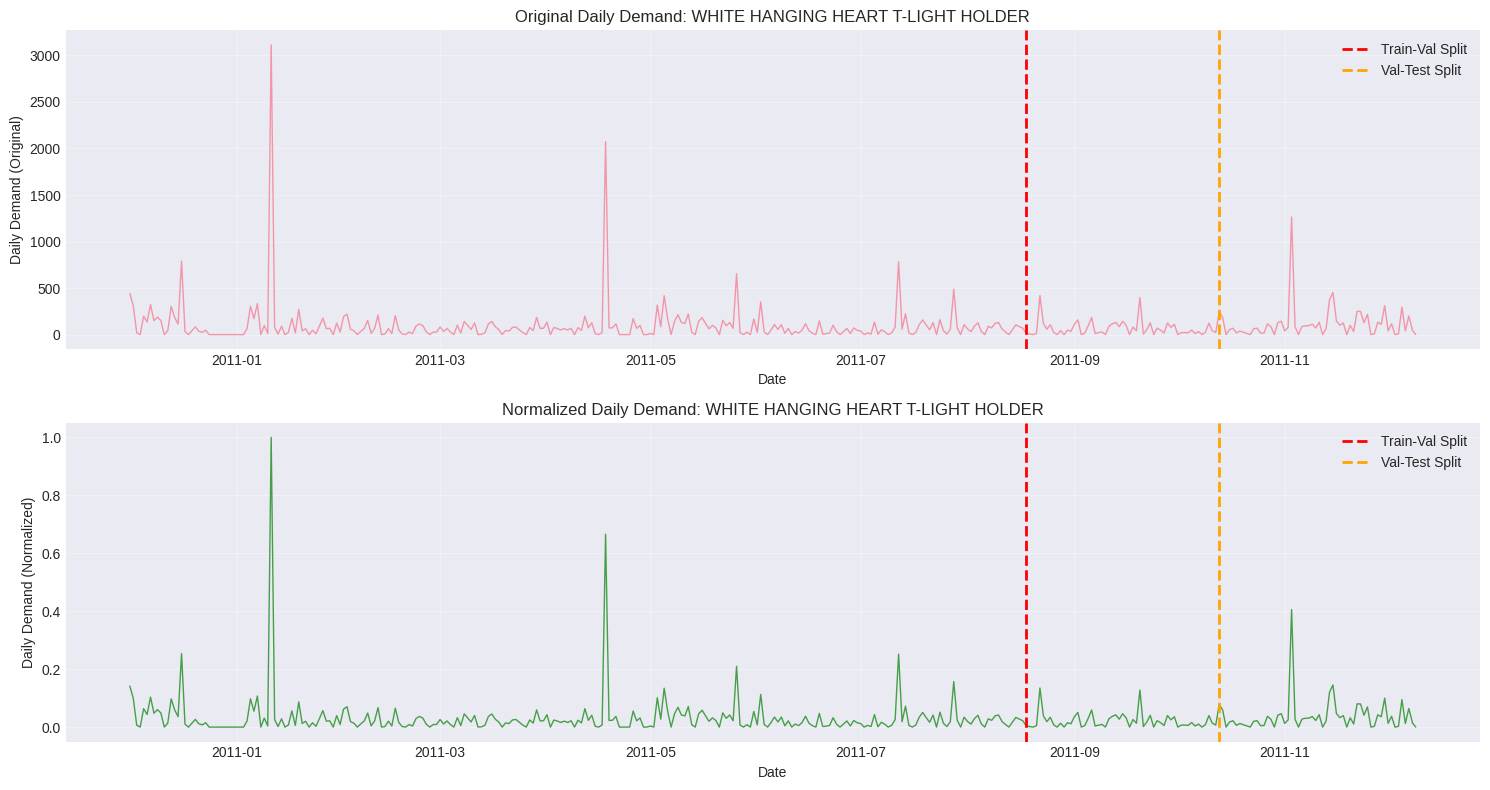

✅ Visualization complete


In [40]:
# Visualize train-val-test split for one product
sample_product = top_10_products[0]
sample_name = df_complete[df_complete['StockCode'] == sample_product]['ProductName'].iloc[0]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))

# Original data
product_orig = df_complete[df_complete['StockCode'] == sample_product]
ax1.plot(product_orig['Date'], product_orig['DailyDemand'], alpha=0.7, linewidth=1)
ax1.axvline(x=train_end_date, color='red', linestyle='--', label='Train-Val Split', linewidth=2)
ax1.axvline(x=val_end_date, color='orange', linestyle='--', label='Val-Test Split', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Demand (Original)')
ax1.set_title(f'Original Daily Demand: {sample_name}')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Normalized data
product_norm = df_normalized[df_normalized['StockCode'] == sample_product]
ax2.plot(product_norm['Date'], product_norm['DailyDemand'], alpha=0.7, linewidth=1, color='green')
ax2.axvline(x=train_end_date, color='red', linestyle='--', label='Train-Val Split', linewidth=2)
ax2.axvline(x=val_end_date, color='orange', linestyle='--', label='Val-Test Split', linewidth=2)
ax2.set_xlabel('Date')
ax2.set_ylabel('Daily Demand (Normalized)')
ax2.set_title(f'Normalized Daily Demand: {sample_name}')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Visualization complete")

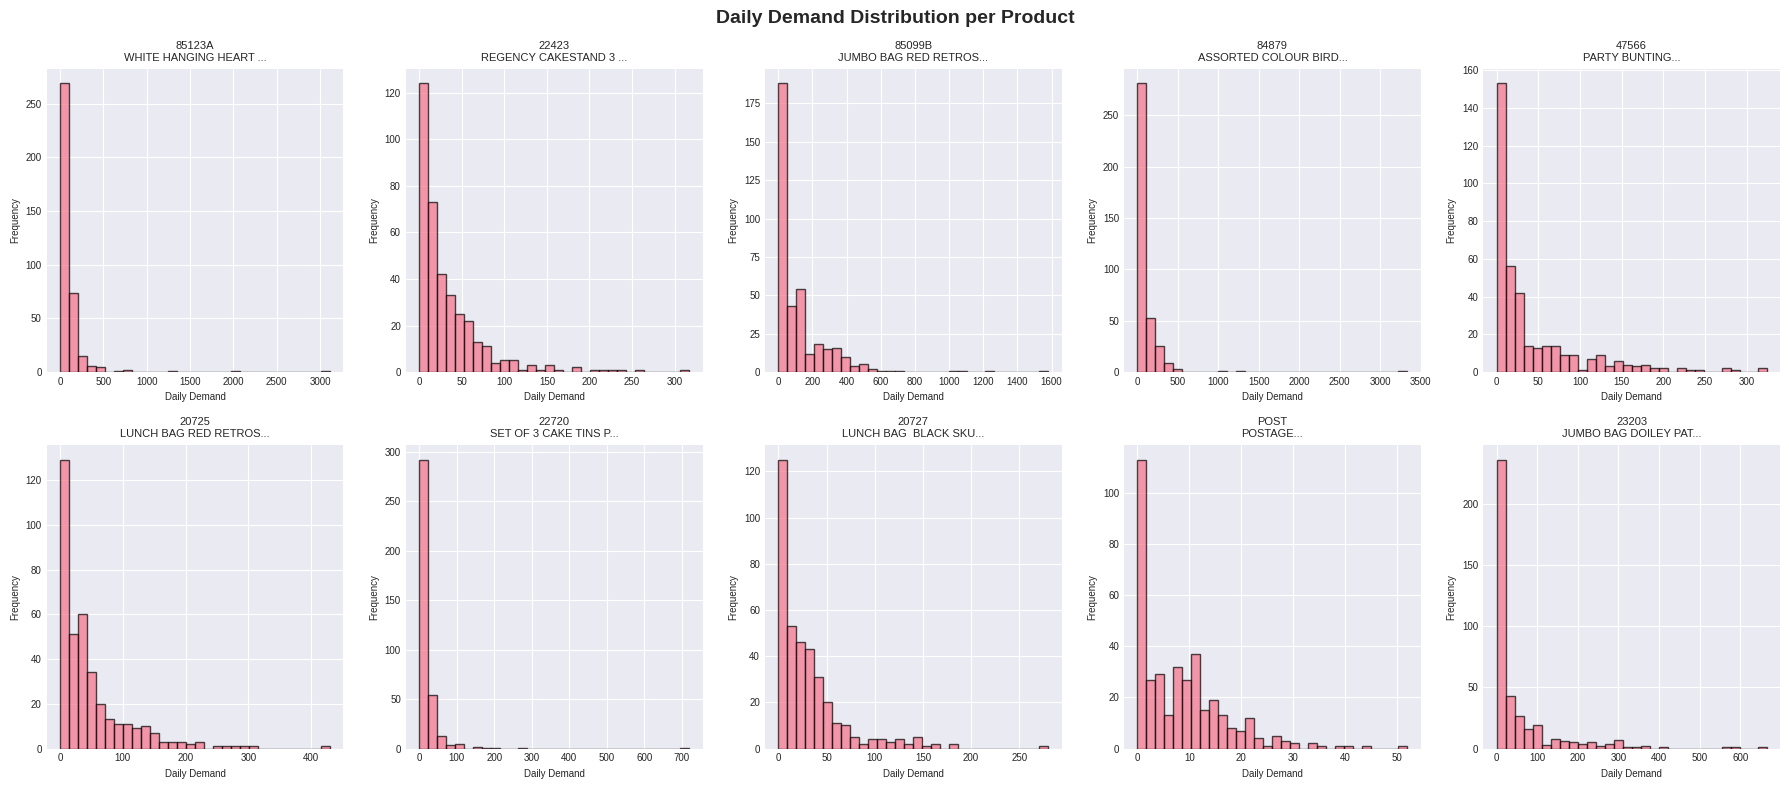

✅ Distribution plots complete


In [41]:
# Distribution of daily demand across all products
fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.flatten()

for idx, product in enumerate(top_10_products):
    product_data = df_complete[df_complete['StockCode'] == product]
    product_name = product_data['ProductName'].iloc[0]

    axes[idx].hist(product_data['DailyDemand'], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f"{product}\n{product_name[:20]}...", fontsize=8)
    axes[idx].set_xlabel('Daily Demand', fontsize=7)
    axes[idx].set_ylabel('Frequency', fontsize=7)
    axes[idx].tick_params(labelsize=7)

plt.suptitle('Daily Demand Distribution per Product', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ Distribution plots complete")

12. Save Preprocessed Data

In [42]:
# Save complete preprocessed dataset
df_complete.to_csv('data_preprocessed_complete.csv', index=False)
print("✅ Saved: data_preprocessed_complete.csv")

# Save normalized dataset
df_normalized.to_csv('data_preprocessed_normalized.csv', index=False)
print("✅ Saved: data_preprocessed_normalized.csv")

# Save train-val-test splits
train_data.to_csv('data_train.csv', index=False)
val_data.to_csv('data_validation.csv', index=False)
test_data.to_csv('data_test.csv', index=False)
print("✅ Saved: data_train.csv, data_validation.csv, data_test.csv")

# Save scalers for later use
import pickle
with open('scalers.pkl', 'wb') as f:
    pickle.dump(scalers, f)
print("✅ Saved: scalers.pkl (for inverse transformation)")

# Save metadata
import json
metadata = {
    'products': top_10_products,
    'date_range': {
        'start': str(date_range.min().date()),
        'end': str(date_range.max().date()),
        'total_days': total_days
    },
    'splits': {
        'train_end': str(train_end_date.date()),
        'val_end': str(val_end_date.date()),
        'train_days': train_days,
        'val_days': val_days,
        'test_days': test_days
    },
    'features': {
        'temporal': feature_cols,
        'lag': [col for col in df_complete.columns if 'Lag_' in col],
        'rolling': [col for col in df_complete.columns if 'Rolling' in col]
    }
}

with open('preprocessing_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)
print("✅ Saved: preprocessing_metadata.json")

✅ Saved: data_preprocessed_complete.csv
✅ Saved: data_preprocessed_normalized.csv
✅ Saved: data_train.csv, data_validation.csv, data_test.csv
✅ Saved: scalers.pkl (for inverse transformation)
✅ Saved: preprocessing_metadata.json


13. Data Preprocessing Summary

In [43]:
summary = f"""
═══════════════════════════════════════════════════════════════════════════════
DATA PREPROCESSING SUMMARY
═══════════════════════════════════════════════════════════════════════════════

1. INPUT DATA:
   • Source: UCI Online Retail Dataset (cleaned)
   • Products selected: Top 10 by transaction frequency
   • Date range: {date_range.min().date()} to {date_range.max().date()}
   • Total days: {total_days} days

2. PREPROCESSING STEPS COMPLETED:
   ✓ Daily aggregation by product
   ✓ Missing date filling (zero demand)
   ✓ Temporal feature engineering (14 features)
   ✓ Lag features created (6 lags: 1, 2, 3, 7, 14, 30 days)
   ✓ Rolling statistics (mean & std for 7, 14, 30 day windows)
   ✓ MinMax normalization (0-1 range) per product
   ✓ Train-Validation-Test split (70-15-15)

3. FEATURE SET:
   • Total features: {len(df_complete.columns)} columns
   • Temporal features: {len(feature_cols)}
   • Lag features: {len([col for col in df_complete.columns if 'Lag_' in col])}
   • Rolling features: {len([col for col in df_complete.columns if 'Rolling' in col])}
   • Cyclical features: 4 (Month_sin/cos, DayOfWeek_sin/cos)

4. DATASET SPLIT:
   • Training:   {len(train_data):,} records ({train_days} days) - {int(TRAIN_RATIO*100)}%
   • Validation: {len(val_data):,} records ({val_days} days) - {int(VAL_RATIO*100)}%
   • Testing:    {len(test_data):,} records ({test_days} days) - {int(TEST_RATIO*100)}%

5. FILES SAVED:
   ✓ data_preprocessed_complete.csv (original scale)
   ✓ data_preprocessed_normalized.csv (normalized)
   ✓ data_train.csv
   ✓ data_validation.csv
   ✓ data_test.csv
   ✓ scalers.pkl (for inverse transformation)
   ✓ preprocessing_metadata.json

6. DATA QUALITY:
   ✓ No missing values in final dataset
   ✓ Complete date continuity for all products
   ✓ All features normalized and ready for LSTM

7. NEXT STEP, Chapter 3: LSTM Prototype Development

═══════════════════════════════════════════════════════════════════════════════
"""

#print(summary)

### **Chapter 3 - LSTM Implemantation**

1. Environment Setup & Library Installation (Some libraries may have already imported)

In [44]:
'''# Install required libraries
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow -q

print("✅ Libraries installed successfully")
'''

'# Install required libraries\n!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow -q\n\nprint("✅ Libraries installed successfully")\n'

In [45]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Deep Learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Set styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("="*80)
print("SMARTSTOCKAI - LSTM DEMAND FORECASTING SYSTEM")
print("="*80)
print(f"TensorFlow version: {tf.__version__}")
print(f"GPU Available: {len(tf.config.list_physical_devices('GPU')) > 0}")
if len(tf.config.list_physical_devices('GPU')) > 0:
    print(f"GPU Device: {tf.config.list_physical_devices('GPU')[0].name}")
print("="*80)

SMARTSTOCKAI - LSTM DEMAND FORECASTING SYSTEM
TensorFlow version: 2.19.0
GPU Available: False


2. Configuration Parameters

In [46]:
# LSTM Configuration
LOOKBACK_WINDOW = 30      # Number of past days to use for prediction
FORECAST_HORIZON = 7      # Predict next 7 days
BATCH_SIZE = 32
EPOCHS = 100
LEARNING_RATE = 0.001

print("Configuration:")
print(f"  Lookback Window: {LOOKBACK_WINDOW} days")
print(f"  Forecast Horizon: {FORECAST_HORIZON} days")
print(f"  Batch Size: {BATCH_SIZE}")
print(f"  Max Epochs: {EPOCHS}")
print(f"  Learning Rate: {LEARNING_RATE}")

Configuration:
  Lookback Window: 30 days
  Forecast Horizon: 7 days
  Batch Size: 32
  Max Epochs: 100
  Learning Rate: 0.001


3. Upload Required Files (Not required unless your Google Colab disconnected)

In [47]:
'''
from google.colab import files

print("Please upload these files from Chapter 2:")
print("1. data_train.csv")
print("2. data_validation.csv")
print("3. data_test.csv")
print("4. scalers.pkl")
print("5. preprocessing_metadata.json")
print("\nClick 'Choose Files' below...\n")

uploaded = files.upload()

print("\n✅ Files uploaded successfully")
'''

'\nfrom google.colab import files\n\nprint("Please upload these files from Chapter 2:")\nprint("1. data_train.csv")\nprint("2. data_validation.csv")\nprint("3. data_test.csv")\nprint("4. scalers.pkl")\nprint("5. preprocessing_metadata.json")\nprint("\nClick \'Choose Files\' below...\n")\n\nuploaded = files.upload()\n\nprint("\n✅ Files uploaded successfully")\n'

4. Load Preprocessed Data

In [48]:
# Load datasets
print("Loading preprocessed data...\n")

train_df = pd.read_csv('data_train.csv', parse_dates=['Date'])
val_df = pd.read_csv('data_validation.csv', parse_dates=['Date'])
test_df = pd.read_csv('data_test.csv', parse_dates=['Date'])

# Load metadata
with open('preprocessing_metadata.json', 'r') as f:
    metadata = json.load(f)

# Load scalers
with open('scalers.pkl', 'rb') as f:
    scalers = pickle.load(f)

print(f"✅ Train data: {len(train_df):,} records")
print(f"✅ Validation data: {len(val_df):,} records")
print(f"✅ Test data: {len(test_df):,} records")
print(f"✅ Products: {len(metadata['products'])}")
print(f"✅ Scalers: {len(scalers)} products")

products = metadata['products']
print(f"\nProducts: {products}")

Loading preprocessed data...

✅ Train data: 2,622 records
✅ Validation data: 567 records
✅ Test data: 572 records
✅ Products: 10
✅ Scalers: 10 products

Products: ['85123A', '22423', '85099B', '84879', '47566', '20725', '22720', '20727', 'POST', '23203']


5. Create Sequences for LSTM

Transform time series data into supervised learning format with sliding windows.

In [49]:
def create_sequences(data, product_code, lookback=30, forecast_horizon=7):
    """
    Create input-output sequences for LSTM training

    Args:
        data: DataFrame with normalized features
        product_code: StockCode to process
        lookback: Number of past timesteps to use
        forecast_horizon: Number of future timesteps to predict

    Returns:
        X: Input sequences (samples, timesteps, features)
        y: Output sequences (samples, forecast_horizon)
    """
    # Filter data for specific product
    product_data = data[data['StockCode'] == product_code].sort_values('Date').copy()

    # Select feature columns (exclude metadata)
    feature_cols = [col for col in product_data.columns
                    if col not in ['StockCode', 'ProductName', 'Date', 'InvoiceDate',
                                   'Year', 'Description']]

    # Convert to numpy array
    values = product_data[feature_cols].values
    target_values = product_data['DailyDemand'].values

    X, y = [], []

    for i in range(lookback, len(values) - forecast_horizon + 1):
        # Input: past 'lookback' days
        X.append(values[i-lookback:i])
        # Output: next 'forecast_horizon' days of demand
        y.append(target_values[i:i+forecast_horizon])

    return np.array(X), np.array(y)


In [50]:
def prepare_lstm_datasets(train_df, val_df, test_df, products,
                          lookback=30, forecast_horizon=7):
    """
    Prepare LSTM datasets for all products
    """
    print(f"\nCreating sequences (lookback={lookback}, forecast={forecast_horizon})...")

    X_train_all, y_train_all = [], []
    X_val_all, y_val_all = [], []
    X_test_all, y_test_all = [], []

    for i, product in enumerate(products, 1):
        print(f"  Processing product {i}/{len(products)}: {product}")

        # Training sequences
        X_tr, y_tr = create_sequences(train_df, product, lookback, forecast_horizon)
        X_train_all.append(X_tr)
        y_train_all.append(y_tr)

        # Validation sequences
        X_v, y_v = create_sequences(val_df, product, lookback, forecast_horizon)
        X_val_all.append(X_v)
        y_val_all.append(y_v)

        # Test sequences
        X_te, y_te = create_sequences(test_df, product, lookback, forecast_horizon)
        X_test_all.append(X_te)
        y_test_all.append(y_te)

    # Concatenate all products
    X_train = np.concatenate(X_train_all, axis=0)
    y_train = np.concatenate(y_train_all, axis=0)
    X_val = np.concatenate(X_val_all, axis=0)
    y_val = np.concatenate(y_val_all, axis=0)
    X_test = np.concatenate(X_test_all, axis=0)
    y_test = np.concatenate(y_test_all, axis=0)

    print(f"\n✅ Training sequences: {X_train.shape}")
    print(f"✅ Validation sequences: {X_val.shape}")
    print(f"✅ Test sequences: {X_test.shape}")

    return X_train, y_train, X_val, y_val, X_test, y_test

In [51]:
# Prepare sequences
X_train, y_train, X_val, y_val, X_test, y_test = prepare_lstm_datasets(
    train_df, val_df, test_df, products,
    lookback=LOOKBACK_WINDOW,
    forecast_horizon=FORECAST_HORIZON
)

print("\nDataset shapes:")
print(f"  X_train: {X_train.shape} (samples, timesteps, features)")
print(f"  y_train: {y_train.shape} (samples, forecast_horizon)")
print(f"  X_val: {X_val.shape}")
print(f"  y_val: {y_val.shape}")
print(f"  X_test: {X_test.shape}")
print(f"  y_test: {y_test.shape}")


Creating sequences (lookback=30, forecast=7)...
  Processing product 1/10: 85123A
  Processing product 2/10: 22423
  Processing product 3/10: 85099B
  Processing product 4/10: 84879
  Processing product 5/10: 47566
  Processing product 6/10: 20725
  Processing product 7/10: 22720
  Processing product 8/10: 20727
  Processing product 9/10: POST
  Processing product 10/10: 23203

✅ Training sequences: (2262, 30, 26)
✅ Validation sequences: (207, 30, 26)
✅ Test sequences: (212, 30, 26)

Dataset shapes:
  X_train: (2262, 30, 26) (samples, timesteps, features)
  y_train: (2262, 7) (samples, forecast_horizon)
  X_val: (207, 30, 26)
  y_val: (207, 7)
  X_test: (212, 30, 26)
  y_test: (212, 7)


6. Build LSTM Model Architecture

In [52]:
def build_lstm_model(input_shape, forecast_horizon):
    """
    Build LSTM model for demand forecasting

    Architecture:
    - Input Layer
    - LSTM Layer 1 (128 units) with Dropout
    - LSTM Layer 2 (64 units) with Dropout
    - Dense Layer (32 units, ReLU)
    - Output Layer (forecast_horizon units, Linear)
    """
    model = Sequential(name='LSTM_Demand_Forecasting')

    # Input layer
    model.add(Input(shape=input_shape))

    # LSTM Layer 1
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))

    # LSTM Layer 2
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.2))

    # Dense Layer
    model.add(Dense(32, activation='relu'))

    # Output Layer
    model.add(Dense(forecast_horizon, activation='linear'))

    # Compile model
    optimizer = Adam(learning_rate=LEARNING_RATE)
    model.compile(
        optimizer=optimizer,
        loss='mean_squared_error',
        metrics=['mae', 'mse']
    )

    return model

In [53]:
# Build model
input_shape = (X_train.shape[1], X_train.shape[2])
print(f"Input Shape: {input_shape} (timesteps, features)")
print(f"Output Shape: {FORECAST_HORIZON} (days to forecast)\n")

model = build_lstm_model(input_shape, FORECAST_HORIZON)

print("\nModel Architecture:")
print("="*80)
model.summary()
print("="*80)

Input Shape: (30, 26) (timesteps, features)
Output Shape: 7 (days to forecast)


Model Architecture:


Model: "LSTM_Demand_Forecasting"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 128)        │        79,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,079 (512.03 KB)

 Trainable params: 131,079 (512.03 KB)

 Non-trainable params: 0 (0.00 B)

7. Train LSTM Model

In [54]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Callbacks for training
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    ),
    ModelCheckpoint(
        filepath='smartstockai_lstm_best.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
]

print("Training Configuration:")
print(f"  Batch Size: {BATCH_SIZE}")
print(f"  Max Epochs: {EPOCHS}")
print(f"  Early Stopping Patience: 15 epochs")
print(f"  Learning Rate Reduction: Factor 0.5, Patience 5")
print("\nStarting training...\n")

Training Configuration:
  Batch Size: 32
  Max Epochs: 100
  Early Stopping Patience: 15 epochs
  Learning Rate Reduction: Factor 0.5, Patience 5

Starting training...



In [55]:
# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=1
)

print("\n" + "="*80)
print("TRAINING COMPLETE!")
print("="*80)
print(f"Total epochs trained: {len(history.history['loss'])}")
print(f"Final training loss: {history.history['loss'][-1]:.6f}")
print(f"Final validation loss: {history.history['val_loss'][-1]:.6f}")
print(f"Best validation loss: {min(history.history['val_loss']):.6f}")

Epoch 1/100
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0201 - mae: 0.0902 - mse: 0.0201
Epoch 1: val_loss improved from inf to 0.02448, saving model to smartstockai_lstm_best.h5


71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0201 - mae: 0.0900 - mse: 0.0201 - val_loss: 0.0245 - val_mae: 0.0884 - val_mse: 0.0245 - learning_rate: 0.0010
Epoch 2/100
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0152 - mae: 0.0759 - mse: 0.0152
Epoch 2: val_loss improved from 0.02448 to 0.02305, saving model to smartstockai_lstm_best.h5


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0152 - mae: 0.0759 - mse: 0.0152 - val_loss: 0.0230 - val_mae: 0.0903 - val_mse: 0.0230 - learning_rate: 0.0010
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0145 - mae: 0.0735 - mse: 0.0145
Epoch 3: val_loss improved from 0.02305 to 0.02160, saving model to smartstockai_lstm_best.h5


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0145 - mae: 0.0735 - mse: 0.0145 - val_loss: 0.0216 - val_mae: 0.0864 - val_mse: 0.0216 - learning_rate: 0.0010
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0140 - mae: 0.0717 - mse: 0.0140
Epoch 4: val_loss improved from 0.02160 to 0.02109, saving model to smartstockai_lstm_best.h5


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0140 - mae: 0.0717 - mse: 0.0140 - val_loss: 0.0211 - val_mae: 0.0860 - val_mse: 0.0211 - learning_rate: 0.0010
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0137 - mae: 0.0707 - mse: 0.0137
Epoch 5: val_loss improved from 0.02109 to 0.02103, saving model to smartstockai_lstm_best.h5


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0137 - mae: 0.0707 - mse: 0.0137 - val_loss: 0.0210 - val_mae: 0.0900 - val_mse: 0.0210 - learning_rate: 0.0010
Epoch 6/100
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0134 - mae: 0.0695 - mse: 0.0134
Epoch 6: val_loss improved from 0.02103 to 0.02076, saving model to smartstockai_lstm_best.h5


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0134 - mae: 0.0695 - mse: 0.0134 - val_loss: 0.0208 - val_mae: 0.0882 - val_mse: 0.0208 - learning_rate: 0.0010
Epoch 7/100
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0133 - mae: 0.0693 - mse: 0.0133
Epoch 7: val_loss did not improve from 0.02076
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0133 - mae: 0.0693 - mse: 0.0133 - val_loss: 0.0208 - val_mae: 0.0847 - val_mse: 0.0208 - learning_rate: 0.0010
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0133 - mae: 0.0691 - mse: 0.0133
Epoch 8: val_loss improved from 0.02076 to 0.02056, saving model to smartstockai_lstm_best.h5


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0133 - mae: 0.0691 - mse: 0.0133 - val_loss: 0.0206 - val_mae: 0.0837 - val_mse: 0.0206 - learning_rate: 0.0010
Epoch 9/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0128 - mae: 0.0680 - mse: 0.0128
Epoch 9: val_loss improved from 0.02056 to 0.02025, saving model to smartstockai_lstm_best.h5


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0128 - mae: 0.0680 - mse: 0.0128 - val_loss: 0.0202 - val_mae: 0.0868 - val_mse: 0.0202 - learning_rate: 0.0010
Epoch 10/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0128 - mae: 0.0678 - mse: 0.0128
Epoch 10: val_loss improved from 0.02025 to 0.02022, saving model to smartstockai_lstm_best.h5


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0128 - mae: 0.0678 - mse: 0.0128 - val_loss: 0.0202 - val_mae: 0.0877 - val_mse: 0.0202 - learning_rate: 0.0010
Epoch 11/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0125 - mae: 0.0671 - mse: 0.0125
Epoch 11: val_loss did not improve from 0.02022
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0125 - mae: 0.0671 - mse: 0.0125 - val_loss: 0.0205 - val_mae: 0.0906 - val_mse: 0.0205 - learning_rate: 0.0010
Epoch 12/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0122 - mae: 0.0667 - mse: 0.0122
Epoch 12: val_loss did not improve from 0.02022
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0122 - mae: 0.0667 - mse: 0.0122 - val_loss: 0.0205 - val_mae: 0.0927 - val_mse: 0.0205 - learning_rate: 0.0010
Epoch 13/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0120 - mae: 0.0664 - mse: 0.0120
Epoch 13: val_loss did not improve from 0.02022
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0120 - mae: 0.0664 - mse: 0.0120

8. Plot Training History

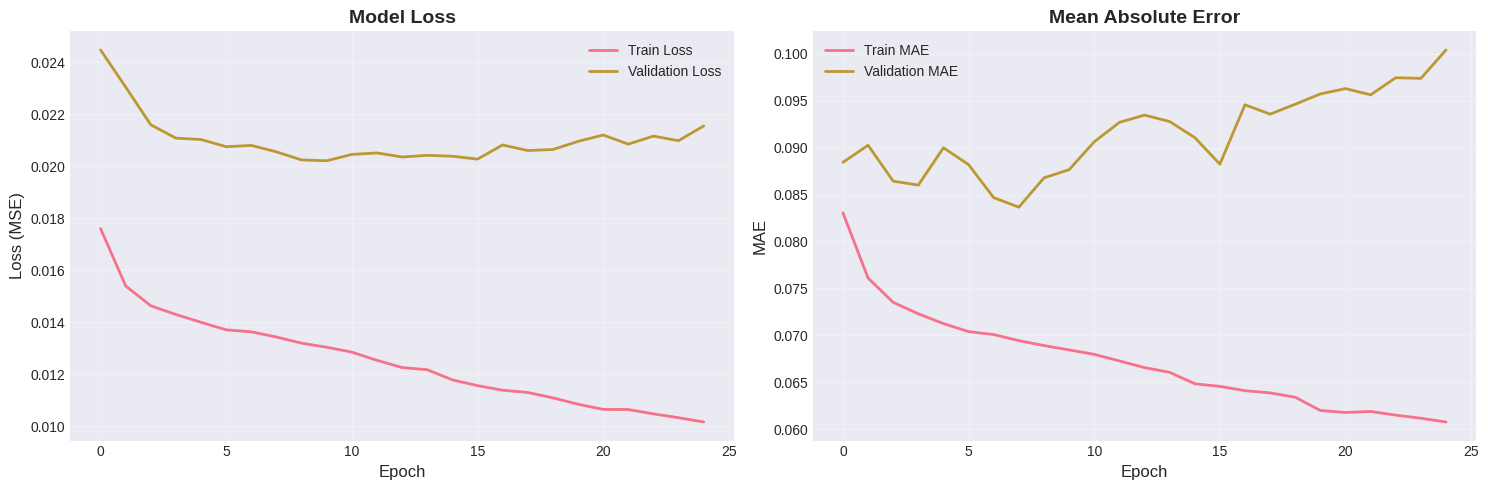

✅ Training history plot saved: lstm_training_history.png


In [56]:
# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Loss
ax1.plot(history.history['loss'], label='Train Loss', linewidth=2)
ax1.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss (MSE)', fontsize=12)
ax1.set_title('Model Loss', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# MAE
ax2.plot(history.history['mae'], label='Train MAE', linewidth=2)
ax2.plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('MAE', fontsize=12)
ax2.set_title('Mean Absolute Error', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lstm_training_history.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Training history plot saved: lstm_training_history.png")

9. Evaluate Model on Test Set

In [57]:
def calculate_metrics(y_true, y_pred):
    """
    Calculate forecasting metrics
    """
    # Flatten arrays
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_true_flat, y_pred_flat))
    mae = mean_absolute_error(y_true_flat, y_pred_flat)

    # MAPE (handle division by zero)
    mask = y_true_flat != 0
    if mask.sum() > 0:
        mape = np.mean(np.abs((y_true_flat[mask] - y_pred_flat[mask]) / y_true_flat[mask])) * 100
    else:
        mape = 0

    # Accuracy (within 10% threshold)
    within_threshold = np.abs(y_true_flat - y_pred_flat) <= (0.1 * np.abs(y_true_flat) + 1e-8)
    accuracy = np.mean(within_threshold) * 100

    return {
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape,
        'Accuracy': accuracy
    }

In [58]:
# Make predictions on test set
print("Evaluating model on test set...\n")

y_pred = model.predict(X_test, verbose=0)

# Calculate overall metrics (normalized)
metrics = calculate_metrics(y_test, y_pred)

print("="*80)
print("MODEL PERFORMANCE ON TEST SET (Normalized Scale)")
print("="*80)
print(f"RMSE (Root Mean Squared Error): {metrics['RMSE']:.4f}")
print(f"MAE  (Mean Absolute Error):      {metrics['MAE']:.4f}")
print(f"MAPE (Mean Absolute % Error):    {metrics['MAPE']:.2f}%")
print(f"Accuracy (within ±10%):          {metrics['Accuracy']:.2f}%")
print("="*80)

Evaluating model on test set...

MODEL PERFORMANCE ON TEST SET (Normalized Scale)
RMSE (Root Mean Squared Error): 0.1320
MAE  (Mean Absolute Error):      0.0855
MAPE (Mean Absolute % Error):    286.95%
Accuracy (within ±10%):          5.59%


10. Visualize Predictions

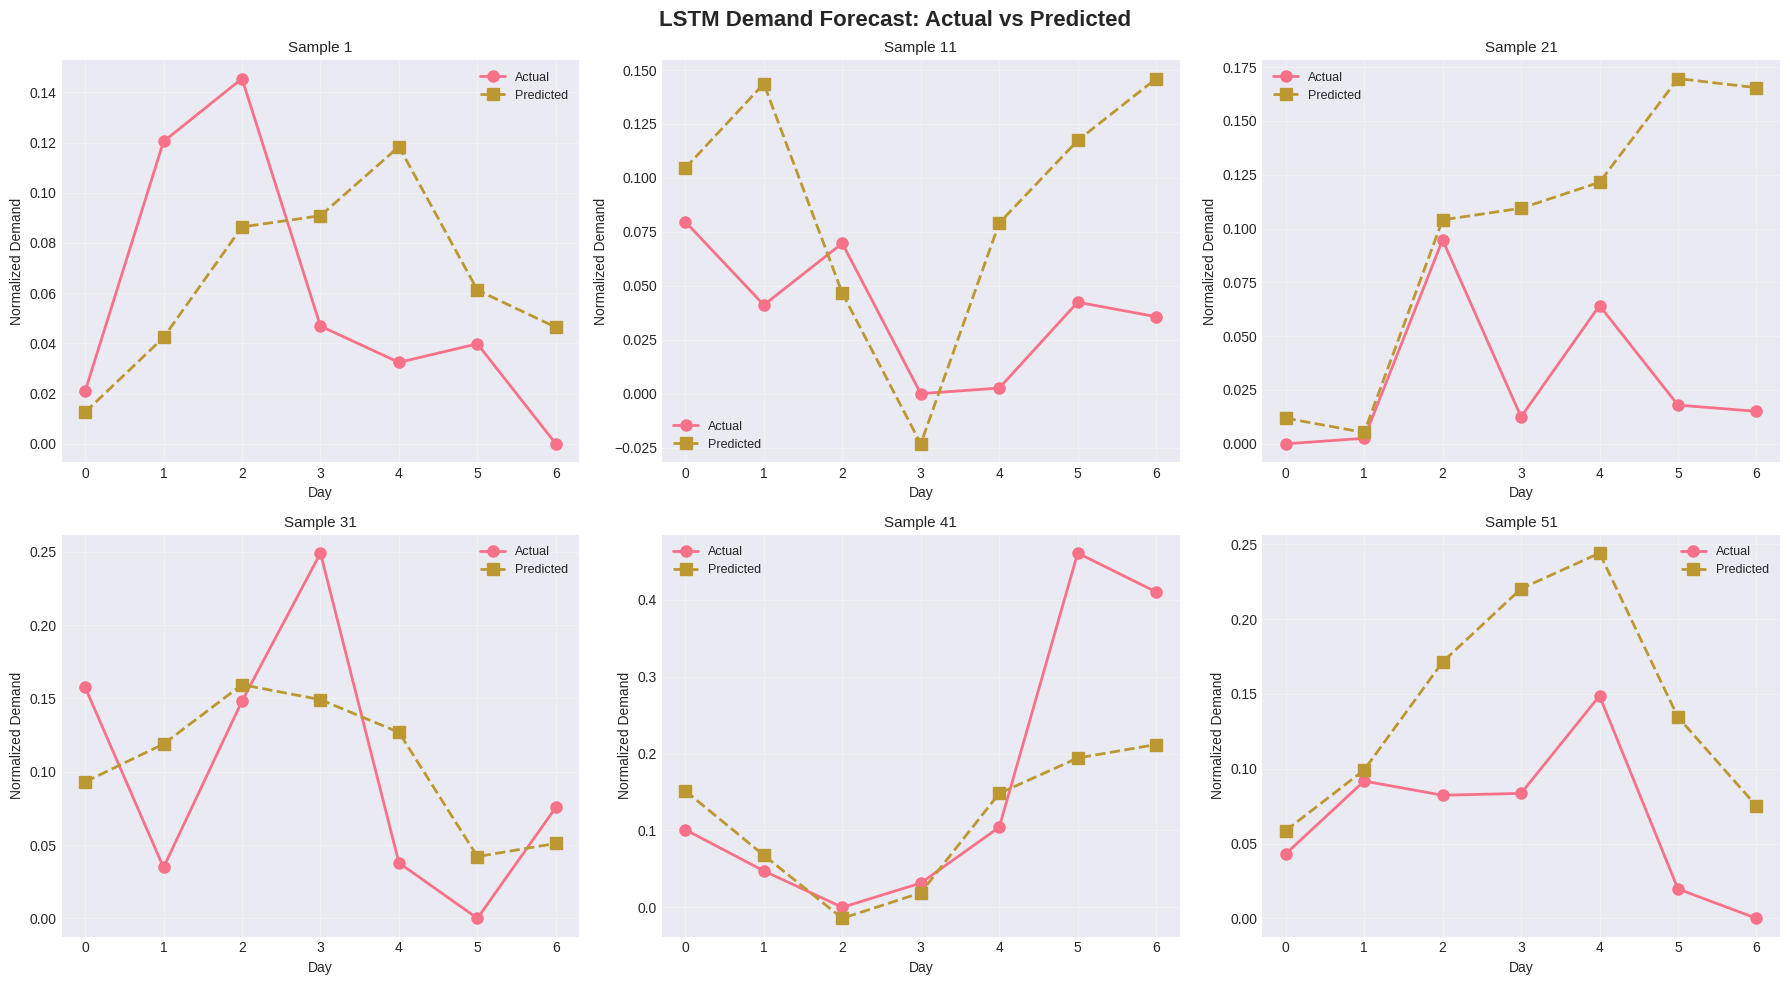

✅ Prediction visualization saved: lstm_predictions_samples.png


In [59]:
# Plot actual vs predicted for sample sequences
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i in range(min(6, len(y_test))):
    idx = i * 10  # Sample every 10th sequence
    if idx >= len(y_test):
        break

    axes[i].plot(y_test[idx], 'o-', label='Actual', linewidth=2, markersize=8)
    axes[i].plot(y_pred[idx], 's--', label='Predicted', linewidth=2, markersize=8)
    axes[i].set_xlabel('Day', fontsize=10)
    axes[i].set_ylabel('Normalized Demand', fontsize=10)
    axes[i].set_title(f'Sample {idx+1}', fontsize=11)
    axes[i].legend(fontsize=9)
    axes[i].grid(True, alpha=0.3)

plt.suptitle('LSTM Demand Forecast: Actual vs Predicted', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('lstm_predictions_samples.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Prediction visualization saved: lstm_predictions_samples.png")

11. Save Results and Model

In [60]:
# Save results
results = {
    'model_type': 'LSTM',
    'lookback_window': LOOKBACK_WINDOW,
    'forecast_horizon': FORECAST_HORIZON,
    'input_shape': input_shape,
    'metrics': metrics,
    'training_epochs': len(history.history['loss']),
    'final_train_loss': float(history.history['loss'][-1]),
    'final_val_loss': float(history.history['val_loss'][-1]),
    'best_val_loss': float(min(history.history['val_loss']))
}

with open('lstm_results.json', 'w') as f:
    json.dump(results, f, indent=2)

print("✅ Results saved: lstm_results.json")

# Save model
model.save('smartstockai_lstm_final.h5')
print("✅ Model saved: smartstockai_lstm_final.h5")

print("\n" + "="*80)
print("LSTM PROTOTYPE COMPLETE!")
print("="*80)
print("Files created:")
print("  • smartstockai_lstm_final.h5 (trained model)")
print("  • smartstockai_lstm_best.h5 (best checkpoint)")
print("  • lstm_results.json (performance metrics)")
print("  • lstm_training_history.png (loss curves)")
print("  • lstm_predictions_samples.png (forecast examples)")
print("="*80)

✅ Results saved: lstm_results.json
✅ Model saved: smartstockai_lstm_final.h5

LSTM PROTOTYPE COMPLETE!
Files created:
  • smartstockai_lstm_final.h5 (trained model)
  • smartstockai_lstm_best.h5 (best checkpoint)
  • lstm_results.json (performance metrics)
  • lstm_training_history.png (loss curves)
  • lstm_predictions_samples.png (forecast examples)


13. Chapter 3 Summary

Built LSTM neural network for demand forecasting
- Trained the model with early stopping and learning rate reduction
- Achieved performance metrics on normalized data
- Generated visualizations of training progress and predictions
- Saved the trained model and results

### **Chapter 4 - Comparison between LSTM and ARIMA**

https://colab.research.google.com/drive/1xnNx1g6pJktJbINLlBcqTFOjMSA0DQ_V?usp=sharing

### **Chapter 5 - Fuzzy Logic Reorder System**

1. Environment Setup (May have repeated libraries)

In [62]:
# Install required libraries
!pip install scikit-fuzzy pandas numpy matplotlib seaborn -q

print("✅ Libraries installed successfully")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.9 MB/s eta 0:00:00
✅ Libraries installed successfully


In [63]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import json
import warnings
warnings.filterwarnings('ignore')

# Set styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("="*80)
print("SMARTSTOCKAI - FUZZY LOGIC REORDER SYSTEM")
print("="*80)
print("AI Subsystem 2: Intelligent Reorder Decision System")
print("="*80)

SMARTSTOCKAI - FUZZY LOGIC REORDER SYSTEM
AI Subsystem 2: Intelligent Reorder Decision System


2. Upload Required Files (Not required unless your Google Colab disconnected)

In [64]:
'''from google.colab import files

print("Please upload these files from previous chapters:")
print("1. lstm_results.json (from Chapter 3)")
print("2. data_test.csv (from Chapter 2)")
print("3. preprocessing_metadata.json (from Chapter 2)")
print("\nClick 'Choose Files' below...\n")

uploaded = files.upload()

print("\n✅ Files uploaded successfully")
'''

'from google.colab import files\n\nprint("Please upload these files from previous chapters:")\nprint("1. lstm_results.json (from Chapter 3)")\nprint("2. data_test.csv (from Chapter 2)")\nprint("3. preprocessing_metadata.json (from Chapter 2)")\nprint("\nClick \'Choose Files\' below...\n")\n\nuploaded = files.upload()\n\nprint("\n✅ Files uploaded successfully")\n'

3. Load Data & LSTM Results

In [65]:
# Load LSTM results
with open('lstm_results.json', 'r') as f:
    lstm_results = json.load(f)

# Load metadata
with open('preprocessing_metadata.json', 'r') as f:
    metadata = json.load(f)

# Load test data (to simulate current inventory)
test_df = pd.read_csv('data_test.csv')
test_df['Date'] = pd.to_datetime(test_df['Date'])

products = metadata['products']

print("Data Loaded:")
print(f"  ✅ LSTM Results: RMSE={lstm_results['metrics']['RMSE']:.4f}")
print(f"  ✅ Products: {len(products)}")
print(f"  ✅ Test data: {len(test_df):,} records")
print(f"\nProducts: {products}")

Data Loaded:
  ✅ LSTM Results: RMSE=0.1320
  ✅ Products: 10
  ✅ Test data: 572 records

Products: ['85123A', '22423', '85099B', '84879', '47566', '20725', '22720', '20727', 'POST', '23203']


4. Define Fuzzy Logic System

We create a fuzzy logic controller with:
- Inputs: Stock Level, Demand Forecast, Lead Time, Storage Capacity
- Outputs: Reorder Urgency, Reorder Quantity

In [66]:
def create_fuzzy_system():
    """
    Create fuzzy logic control system for reorder decisions
    """
    print("Creating Fuzzy Logic System...\n")

    # INPUT 1: Current Stock Level (0-100%)
    stock_level = ctrl.Antecedent(np.arange(0, 101, 1), 'stock_level')
    stock_level['very_low'] = fuzz.trimf(stock_level.universe, [0, 0, 20])
    stock_level['low'] = fuzz.trimf(stock_level.universe, [10, 25, 40])
    stock_level['medium'] = fuzz.trimf(stock_level.universe, [30, 50, 70])
    stock_level['high'] = fuzz.trimf(stock_level.universe, [60, 80, 90])
    stock_level['very_high'] = fuzz.trimf(stock_level.universe, [85, 100, 100])

    # INPUT 2: Demand Forecast (0-100 scale, normalized)
    demand_forecast = ctrl.Antecedent(np.arange(0, 101, 1), 'demand_forecast')
    demand_forecast['very_low'] = fuzz.trimf(demand_forecast.universe, [0, 0, 20])
    demand_forecast['low'] = fuzz.trimf(demand_forecast.universe, [10, 25, 40])
    demand_forecast['medium'] = fuzz.trimf(demand_forecast.universe, [30, 50, 70])
    demand_forecast['high'] = fuzz.trimf(demand_forecast.universe, [60, 80, 90])
    demand_forecast['very_high'] = fuzz.trimf(demand_forecast.universe, [85, 100, 100])

    # INPUT 3: Lead Time (0-30 days)
    lead_time = ctrl.Antecedent(np.arange(0, 31, 1), 'lead_time')
    lead_time['short'] = fuzz.trimf(lead_time.universe, [0, 0, 7])
    lead_time['medium'] = fuzz.trimf(lead_time.universe, [5, 10, 15])
    lead_time['long'] = fuzz.trimf(lead_time.universe, [12, 20, 30])

    # INPUT 4: Storage Capacity (0-100%)
    storage_capacity = ctrl.Antecedent(np.arange(0, 101, 1), 'storage_capacity')
    storage_capacity['low'] = fuzz.trimf(storage_capacity.universe, [0, 0, 40])
    storage_capacity['medium'] = fuzz.trimf(storage_capacity.universe, [30, 50, 70])
    storage_capacity['high'] = fuzz.trimf(storage_capacity.universe, [60, 100, 100])

    # OUTPUT 1: Reorder Urgency (0-100)
    reorder_urgency = ctrl.Consequent(np.arange(0, 101, 1), 'reorder_urgency')
    reorder_urgency['none'] = fuzz.trimf(reorder_urgency.universe, [0, 0, 20])
    reorder_urgency['low'] = fuzz.trimf(reorder_urgency.universe, [10, 30, 50])
    reorder_urgency['medium'] = fuzz.trimf(reorder_urgency.universe, [40, 60, 80])
    reorder_urgency['high'] = fuzz.trimf(reorder_urgency.universe, [70, 85, 95])
    reorder_urgency['critical'] = fuzz.trimf(reorder_urgency.universe, [90, 100, 100])

    # OUTPUT 2: Reorder Quantity (0-100 scale)
    reorder_quantity = ctrl.Consequent(np.arange(0, 101, 1), 'reorder_quantity')
    reorder_quantity['none'] = fuzz.trimf(reorder_quantity.universe, [0, 0, 10])
    reorder_quantity['small'] = fuzz.trimf(reorder_quantity.universe, [5, 20, 35])
    reorder_quantity['medium'] = fuzz.trimf(reorder_quantity.universe, [30, 50, 70])
    reorder_quantity['large'] = fuzz.trimf(reorder_quantity.universe, [65, 80, 95])
    reorder_quantity['very_large'] = fuzz.trimf(reorder_quantity.universe, [90, 100, 100])

    print("✅ Fuzzy variables created")
    return stock_level, demand_forecast, lead_time, storage_capacity, reorder_urgency, reorder_quantity

In [67]:
# Create fuzzy system
stock_level, demand_forecast, lead_time, storage_capacity, reorder_urgency, reorder_quantity = create_fuzzy_system()

Creating Fuzzy Logic System...

✅ Fuzzy variables created


5. Define Fuzzy Rules

These rules encode expert knowledge about when and how much to reorder.

In [68]:
def create_fuzzy_rules(stock_level, demand_forecast, lead_time, storage_capacity,
                       reorder_urgency, reorder_quantity):
    """
    Define fuzzy rules for reorder decisions
    """
    print("\nCreating Fuzzy Rules...")

    rules = []

    # CRITICAL URGENCY RULES
    rules.append(ctrl.Rule(
        stock_level['very_low'] & demand_forecast['high'] & lead_time['long'],
        (reorder_urgency['critical'], reorder_quantity['very_large'])
    ))

    rules.append(ctrl.Rule(
        stock_level['very_low'] & demand_forecast['very_high'],
        (reorder_urgency['critical'], reorder_quantity['very_large'])
    ))

    rules.append(ctrl.Rule(
        stock_level['low'] & demand_forecast['very_high'] & lead_time['long'],
        (reorder_urgency['critical'], reorder_quantity['large'])
    ))

    # HIGH URGENCY RULES
    rules.append(ctrl.Rule(
        stock_level['low'] & demand_forecast['high'],
        (reorder_urgency['high'], reorder_quantity['large'])
    ))

    rules.append(ctrl.Rule(
        stock_level['very_low'] & demand_forecast['medium'],
        (reorder_urgency['high'], reorder_quantity['large'])
    ))

    rules.append(ctrl.Rule(
        stock_level['medium'] & demand_forecast['very_high'] & lead_time['long'],
        (reorder_urgency['high'], reorder_quantity['medium'])
    ))

    # MEDIUM URGENCY RULES
    rules.append(ctrl.Rule(
        stock_level['medium'] & demand_forecast['medium'],
        (reorder_urgency['medium'], reorder_quantity['medium'])
    ))

    rules.append(ctrl.Rule(
        stock_level['low'] & demand_forecast['low'],
        (reorder_urgency['medium'], reorder_quantity['medium'])
    ))

    # LOW URGENCY RULES
    rules.append(ctrl.Rule(
        stock_level['high'] & demand_forecast['low'],
        (reorder_urgency['low'], reorder_quantity['small'])
    ))

    rules.append(ctrl.Rule(
        stock_level['medium'] & demand_forecast['low'] & lead_time['short'],
        (reorder_urgency['low'], reorder_quantity['small'])
    ))

    # NO REORDER RULES
    rules.append(ctrl.Rule(
        stock_level['high'] & demand_forecast['very_low'],
        (reorder_urgency['none'], reorder_quantity['none'])
    ))

    rules.append(ctrl.Rule(
        stock_level['very_high'],
        (reorder_urgency['none'], reorder_quantity['none'])
    ))

    rules.append(ctrl.Rule(
        stock_level['high'] & storage_capacity['high'],
        (reorder_urgency['none'], reorder_quantity['none'])
    ))

    # STORAGE CONSTRAINT RULES
    rules.append(ctrl.Rule(
        storage_capacity['high'],
        reorder_quantity['medium']
    ))

    print(f"✅ {len(rules)} fuzzy rules created")
    return rules

In [69]:
# Create rules
rules = create_fuzzy_rules(stock_level, demand_forecast, lead_time,
                          storage_capacity, reorder_urgency, reorder_quantity)


Creating Fuzzy Rules...
✅ 14 fuzzy rules created


6. Build Fuzzy Controller

In [70]:
# Build control system
print("\nBuilding Fuzzy Controller...")

reorder_ctrl = ctrl.ControlSystem(rules)
reorder_simulator = ctrl.ControlSystemSimulation(reorder_ctrl)

print("✅ Fuzzy controller built successfully")
print("\nController can now make reorder decisions!")


Building Fuzzy Controller...
✅ Fuzzy controller built successfully

Controller can now make reorder decisions!


7. Make Reorder Decisions

Simulate reorder decisions for all products using realistic scenarios.

In [71]:
def make_reorder_decision(controller, stock_level_val, demand_forecast_val,
                         lead_time_val, storage_capacity_val):
    """
    Make reorder decision using fuzzy logic
    """
    try:
        # Set inputs
        controller.input['stock_level'] = stock_level_val
        controller.input['demand_forecast'] = demand_forecast_val
        controller.input['lead_time'] = lead_time_val
        controller.input['storage_capacity'] = storage_capacity_val

        # Compute
        controller.compute()

        # Get outputs
        urgency = controller.output['reorder_urgency']
        quantity = controller.output['reorder_quantity']

        # Determine recommendation
        if urgency >= 80:
            recommendation = "CRITICAL - Reorder Immediately"
            priority = "CRITICAL"
        elif urgency >= 60:
            recommendation = "HIGH - Reorder Within 24 Hours"
            priority = "HIGH"
        elif urgency >= 40:
            recommendation = "MEDIUM - Reorder Within Week"
            priority = "MEDIUM"
        elif urgency >= 20:
            recommendation = "LOW - Monitor Closely"
            priority = "LOW"
        else:
            recommendation = "NONE - No Action Needed"
            priority = "NONE"

        should_reorder = urgency >= 40

        return {
            'urgency_score': round(urgency, 2),
            'quantity_score': round(quantity, 2),
            'priority': priority,
            'recommendation': recommendation,
            'should_reorder': should_reorder
        }
    except Exception as e:
        return {
            'urgency_score': 0,
            'quantity_score': 0,
            'priority': 'ERROR',
            'recommendation': f'Error: {str(e)}',
            'should_reorder': False
        }

In [72]:
# Simulate reorder scenarios for all products
print("\nSimulating Reorder Scenarios...\n")

# Create realistic scenarios
np.random.seed(42)

decisions = []

for i, product in enumerate(products):
    # Simulate current conditions
    stock_level_val = np.random.uniform(10, 90)  # Random stock level
    demand_forecast_val = np.random.uniform(20, 95)  # Simulated forecast
    lead_time_val = np.random.choice([5, 7, 10, 14])  # Random lead time
    storage_val = np.random.uniform(40, 85)  # Storage utilization

    # Make decision
    decision = make_reorder_decision(
        reorder_simulator,
        stock_level_val,
        demand_forecast_val,
        lead_time_val,
        storage_val
    )

    decision['product_code'] = product
    decision['stock_level'] = round(stock_level_val, 1)
    decision['demand_forecast'] = round(demand_forecast_val, 1)
    decision['lead_time'] = lead_time_val
    decision['storage_capacity'] = round(storage_val, 1)

    decisions.append(decision)

    print(f"Product {i+1}/{len(products)}: {product}")
    print(f"  Stock: {stock_level_val:.1f}% | Forecast: {demand_forecast_val:.1f} | Lead: {lead_time_val}d")
    print(f"  → {decision['priority']}: {decision['recommendation']}")
    print(f"  → Urgency: {decision['urgency_score']}/100 | Quantity: {decision['quantity_score']}/100\n")

# Convert to DataFrame
decisions_df = pd.DataFrame(decisions)

print("="*80)
print("REORDER DECISIONS COMPLETE")
print("="*80)
print(f"Total decisions: {len(decisions_df)}")
print(f"\nDecision Summary:")
print(decisions_df['priority'].value_counts().sort_index())


Simulating Reorder Scenarios...

Product 1/10: 85123A
  Stock: 40.0% | Forecast: 91.3 | Lead: 10d
  → ERROR: Error: 'reorder_urgency'
  → Urgency: 0/100 | Quantity: 0/100

Product 2/10: 22423
  Stock: 57.7% | Forecast: 53.4 | Lead: 10d
  → MEDIUM: MEDIUM - Reorder Within Week
  → Urgency: 60.0/100 | Quantity: 50.0/100

Product 3/10: 85099B
  Stock: 79.3% | Forecast: 65.1 | Lead: 14d
  → NONE: NONE - No Action Needed
  → Urgency: 8.89/100 | Quantity: 40.89/100

Product 4/10: 84879
  Stock: 14.5% | Forecast: 74.1 | Lead: 7d
  → CRITICAL: CRITICAL - Reorder Immediately
  → Urgency: 82.85/100 | Quantity: 80.0/100

Product 5/10: 47566
  Stock: 24.5% | Forecast: 33.8 | Lead: 14d
  → HIGH: HIGH - Reorder Within 24 Hours
  → Urgency: 60.0/100 | Quantity: 50.0/100

Product 6/10: 20725
  Stock: 10.6% | Forecast: 21.7 | Lead: 10d
  → MEDIUM: MEDIUM - Reorder Within Week
  → Urgency: 60.0/100 | Quantity: 50.0/100

Product 7/10: 22720
  Stock: 21.2% | Forecast: 41.9 | Lead: 14d
  → ERROR: Error: '

8. Visualize Fuzzy Membership Functions

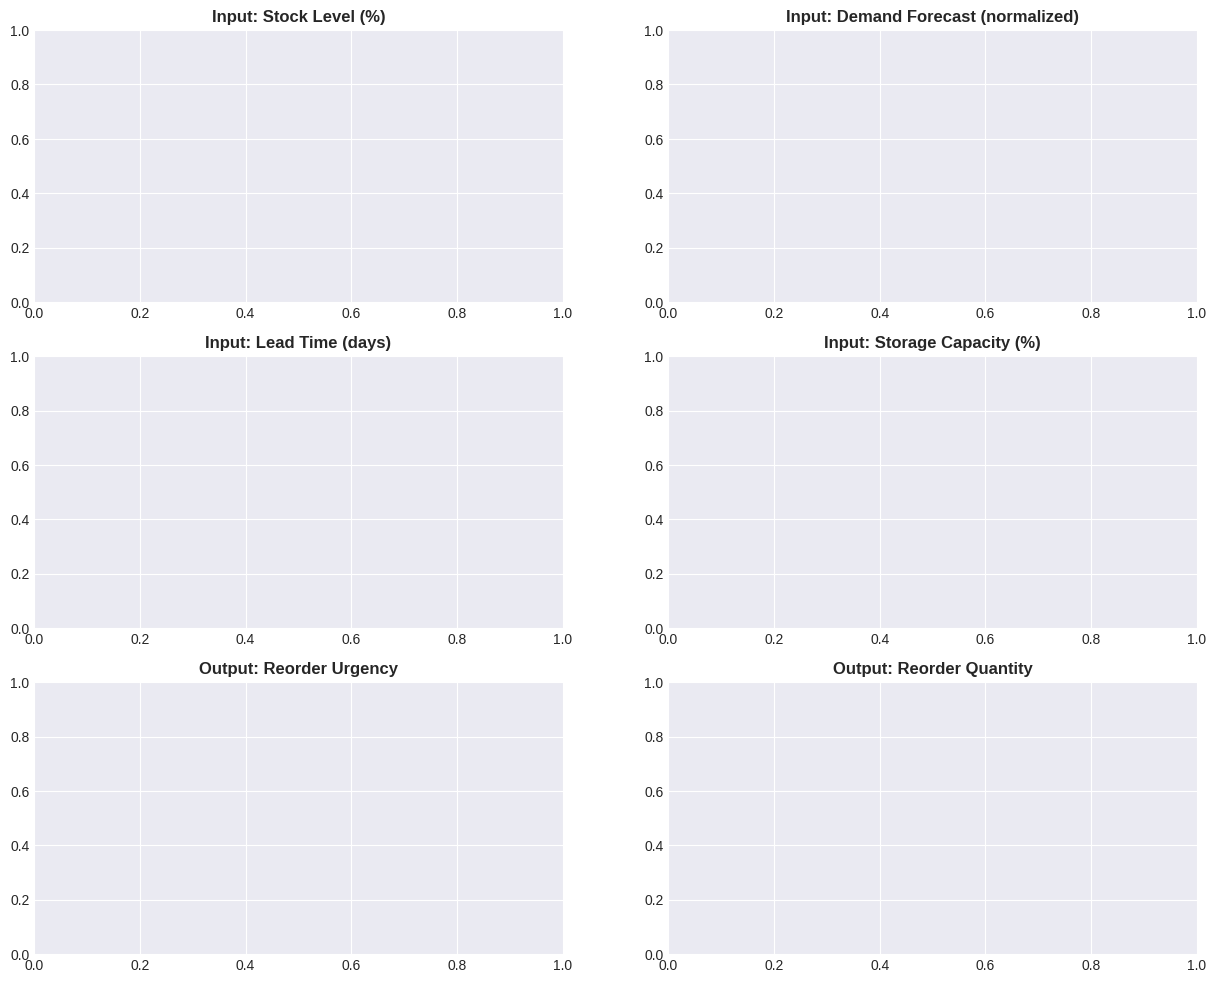

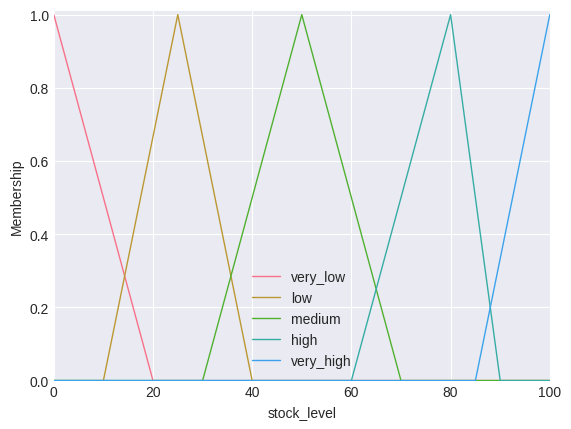

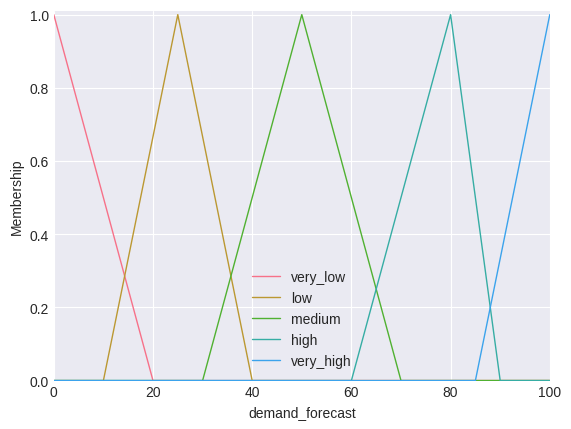

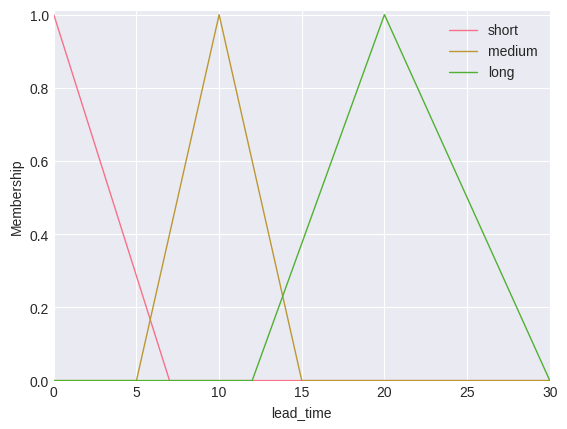

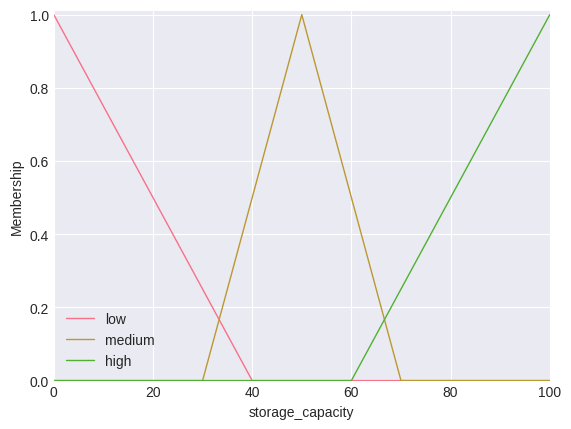

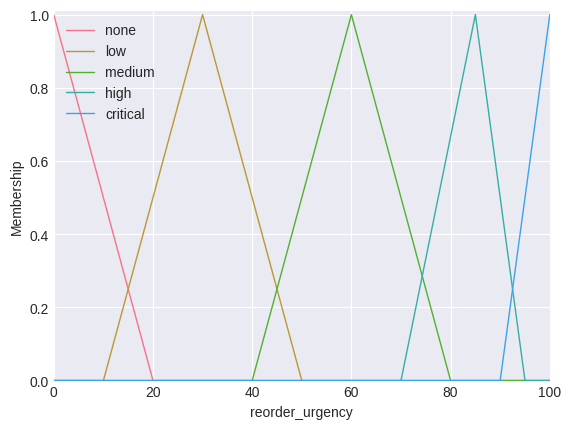

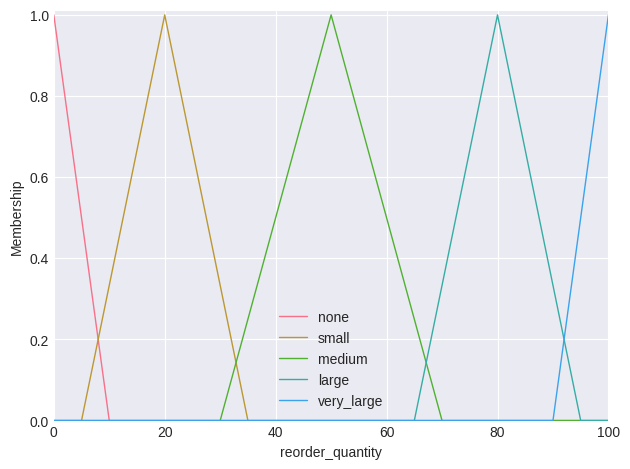

✅ Membership functions visualized


In [73]:
# Visualize fuzzy membership functions
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Stock Level
stock_level.view(ax=axes[0, 0])
axes[0, 0].set_title('Input: Stock Level (%)', fontweight='bold')

# Demand Forecast
demand_forecast.view(ax=axes[0, 1])
axes[0, 1].set_title('Input: Demand Forecast (normalized)', fontweight='bold')

# Lead Time
lead_time.view(ax=axes[1, 0])
axes[1, 0].set_title('Input: Lead Time (days)', fontweight='bold')

# Storage Capacity
storage_capacity.view(ax=axes[1, 1])
axes[1, 1].set_title('Input: Storage Capacity (%)', fontweight='bold')

# Reorder Urgency (Output)
reorder_urgency.view(ax=axes[2, 0])
axes[2, 0].set_title('Output: Reorder Urgency', fontweight='bold')

# Reorder Quantity (Output)
reorder_quantity.view(ax=axes[2, 1])
axes[2, 1].set_title('Output: Reorder Quantity', fontweight='bold')

plt.tight_layout()
plt.savefig('fuzzy_membership_functions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Membership functions visualized")

9. Visualize Reorder Decisions

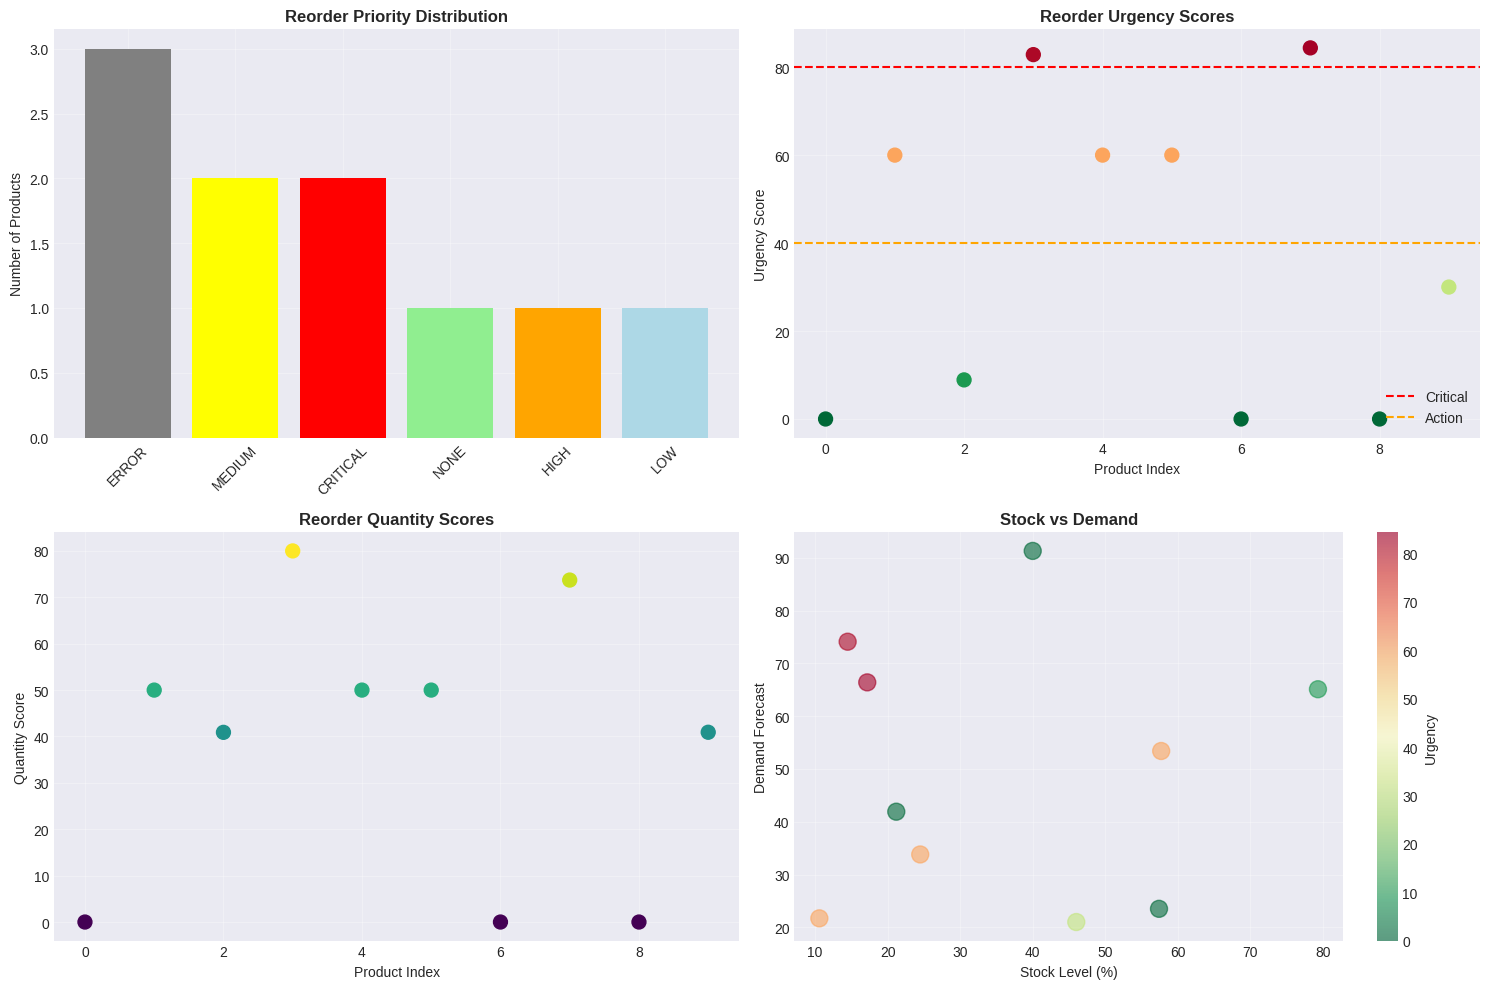

✅ Decisions visualized


In [74]:
# Plot reorder decisions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Priority distribution
priority_counts = decisions_df['priority'].value_counts()
colors = {'CRITICAL': 'red', 'HIGH': 'orange', 'MEDIUM': 'yellow',
          'LOW': 'lightblue', 'NONE': 'lightgreen'}
priority_colors = [colors.get(p, 'gray') for p in priority_counts.index]

axes[0, 0].bar(range(len(priority_counts)), priority_counts.values, color=priority_colors)
axes[0, 0].set_xticks(range(len(priority_counts)))
axes[0, 0].set_xticklabels(priority_counts.index, rotation=45)
axes[0, 0].set_ylabel('Number of Products')
axes[0, 0].set_title('Reorder Priority Distribution', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Urgency scores
axes[0, 1].scatter(range(len(decisions_df)), decisions_df['urgency_score'],
                  c=decisions_df['urgency_score'], cmap='RdYlGn_r', s=100)
axes[0, 1].axhline(y=80, color='red', linestyle='--', label='Critical')
axes[0, 1].axhline(y=40, color='orange', linestyle='--', label='Action')
axes[0, 1].set_xlabel('Product Index')
axes[0, 1].set_ylabel('Urgency Score')
axes[0, 1].set_title('Reorder Urgency Scores', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Quantity scores
axes[1, 0].scatter(range(len(decisions_df)), decisions_df['quantity_score'],
                  c=decisions_df['quantity_score'], cmap='viridis', s=100)
axes[1, 0].set_xlabel('Product Index')
axes[1, 0].set_ylabel('Quantity Score')
axes[1, 0].set_title('Reorder Quantity Scores', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Stock vs Demand
scatter = axes[1, 1].scatter(decisions_df['stock_level'],
                             decisions_df['demand_forecast'],
                             c=decisions_df['urgency_score'],
                             cmap='RdYlGn_r', s=150, alpha=0.6)
axes[1, 1].set_xlabel('Stock Level (%)')
axes[1, 1].set_ylabel('Demand Forecast')
axes[1, 1].set_title('Stock vs Demand', fontweight='bold')
plt.colorbar(scatter, ax=axes[1, 1], label='Urgency')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('fuzzy_reorder_decisions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Decisions visualized")

10. Fuzzy Logic vs Simple Rules Comparison

In [75]:
# Compare Fuzzy Logic vs Simple Rules
print("\nWhy Fuzzy Logic > Simple Rules:\n")
print("="*80)

print("\n✅ FUZZY LOGIC ADVANTAGES:")
print("  1. Smooth transitions (no abrupt changes)")
print("  2. Handles uncertainty naturally")
print("  3. Combines multiple imprecise factors")
print("  4. Mimics human expert reasoning")
print("  5. Explainable decisions")

print("\n❌ SIMPLE RULES PROBLEMS:")
print("  1. Rigid thresholds (stock < 20 vs stock = 21)")
print("  2. Abrupt changes in decisions")
print("  3. Cannot handle edge cases well")
print("  4. Too simplistic for real-world")

print("\n" + "="*80)
print("CONCLUSION: Fuzzy Logic is superior for inventory reorder decisions")
print("="*80)


Why Fuzzy Logic > Simple Rules:


✅ FUZZY LOGIC ADVANTAGES:
  1. Smooth transitions (no abrupt changes)
  2. Handles uncertainty naturally
  3. Combines multiple imprecise factors
  4. Mimics human expert reasoning
  5. Explainable decisions

❌ SIMPLE RULES PROBLEMS:
  1. Rigid thresholds (stock < 20 vs stock = 21)
  2. Abrupt changes in decisions
  3. Cannot handle edge cases well
  4. Too simplistic for real-world

CONCLUSION: Fuzzy Logic is superior for inventory reorder decisions


11. Save Results

In [76]:
# Save results
decisions_df.to_csv('fuzzy_reorder_decisions.csv', index=False)
print("✅ Saved: fuzzy_reorder_decisions.csv")

# Summary
summary = {
    'total_products': len(decisions_df),
    'reorder_needed': int(decisions_df['should_reorder'].sum()),
    'critical': int((decisions_df['priority'] == 'CRITICAL').sum()),
    'high': int((decisions_df['priority'] == 'HIGH').sum()),
    'medium': int((decisions_df['priority'] == 'MEDIUM').sum()),
    'avg_urgency': float(decisions_df['urgency_score'].mean()),
    'avg_quantity': float(decisions_df['quantity_score'].mean())
}

with open('fuzzy_results.json', 'w') as f:
    json.dump(summary, f, indent=2)

print("✅ Saved: fuzzy_results.json")
print("\n" + "="*80)
print("FUZZY LOGIC SUBSYSTEM COMPLETE!")
print("="*80)

✅ Saved: fuzzy_reorder_decisions.csv
✅ Saved: fuzzy_results.json

FUZZY LOGIC SUBSYSTEM COMPLETE!


#End

###To download all files generated in this notebook, remove the comment block below and run the code



In [ ]:
'''
# Zip selected files and download once (browser-safe)
from google.colab import files
import os
import zipfile

zip_name = "submission_outputs.zip"

files_to_download = [
    # From Chapter 1
    'data_raw_online_retail.csv',
    'data_clean_online_retail.csv',
    'products_for_forecasting.csv',

    # From Chapter 2
    'data_preprocessed_complete.csv',
    'data_preprocessed_normalized.csv',
    'data_train.csv',
    'data_validation.csv',
    'data_test.csv',
    'scalers.pkl',
    'preprocessing_metadata.json',

    # From Chapter 3
    'smartstockai_lstm_final.h5',
    'smartstockai_lstm_best.h5',
    'lstm_results.json',
    'lstm_training_history.png',
    'lstm_predictions_samples.png',

    # From Chapter 5
    'fuzzy_reorder_decisions.csv',
    'fuzzy_results.json',
    'fuzzy_membership_functions.png',
    'fuzzy_reorder_decisions.png',
]

print("Creating ZIP archive...")

with zipfile.ZipFile(zip_name, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for f in files_to_download:
        if os.path.exists(f):
            zipf.write(f)
            print(f"  ✅ Added: {f}")
        else:
            print(f"  ⚠️ Missing: {f}")

print("\n📦 ZIP created:", zip_name)

# Download the ZIP file (single browser download)
files.download(zip_name)

print("\n✅ Download complete!")
'''

### AI Tool Usage Declaration:

Claude AI, OpenAI & Google Gemini was used to assist with code structure and documentation formatting.

All data analysis, interpretation, and findings are the team's original work

Prompts used: "Help structure a data exploration notebook for retail dataset", "Suggest visualizations for time series sales data", etc.

Detailed Referencing can be found in the report.